In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [228]:
from google.colab import files
upload = files.upload()


Saving Gross Domestic Product.csv to Gross Domestic Product (4).csv


In [229]:
df= pd.read_csv("Gross Domestic Product.csv")


## Data Collection:
Source: The data was obtained from a reliable source - the Egyptian Ministry of Planning and Economic Development's "Gross Domestic Product by Economic Activity" dataset.



In [230]:
# Display the first few rows
df.head()

,Indicator,Source,Year,Sector,Unit,Agriculture Forestry Fishing,Mining Quarrying,Petroleum,Gas,Other Extraction,...,Accommodation And Food Service Activities,Real Estate Activitie,Real Estate Ownership,Business Services,General Government,Social Services,Education,Health,Other Services,Total GDP (Total Gross Value Added)
0,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2023/2022,Total,Million EGP,1076504.00,772740.80,375669.90,261978.20,135092.50,...,300567.10,989531.20,651307.40,338223.90,567371.5,656275.40,225931.60,261835.20,168508.60,9645960.40
1,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022/2021,Public,Million EGP,1580.49,400745.97,218567.64,177437.88,4740.45,...,3583.06,4651.74,3817.49,834.25,488464.5,31752.55,0.00,30503.53,1249.02,1859954.52
2,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022/2021,Private,Million EGP,856840.23,164816.02,35268.04,30739.85,98808.13,...,172771.70,810434.12,546028.59,264405.53,0.0,468074.06,169983.71,170840.40,127249.95,5597167.76
3,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022/2021,Total,Million EGP,858420.72,565561.99,253835.68,208177.73,103548.58,...,176354.75,815085.85,549846.08,265239.78,488464.5,499826.61,169983.71,201343.93,128498.96,7457122.29
4,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2021/2020,Public,Million EGP,1391.06,278354.46,140184.50,133986.80,4183.16,...,2225.96,4118.39,3383.87,734.52,437417.4,27739.03,0.00,26640.78,1098.25,1538913.04


In [231]:
df.shape

(121, 33)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Indicator                                    121 non-null    object 
 1   Source                                       121 non-null    object 
 2   Year                                         121 non-null    object 
 3   Sector                                       121 non-null    object 
 4   Unit                                         121 non-null    object 
 5   Agriculture Forestry Fishing                 64 non-null     float64
 6   Mining Quarrying                             64 non-null     float64
 7   Petroleum                                    64 non-null     float64
 8   Gas                                          64 non-null     float64
 9   Other Extraction                             64 non-null     float64
 10  Ma

In [233]:
#  Check missing values
df.isnull().sum()

Indicator                                       0
Source                                          0
Year                                            0
Sector                                          0
Unit                                            0
Agriculture Forestry Fishing                   57
Mining Quarrying                               57
Petroleum                                      57
Gas                                            57
Other Extraction                               57
Manufacturing Industries                       57
petroleum Refining                             57
Other Manufacturing                            57
Electricity                                    57
Water Sewerage Remediation Activitie           57
Construction                                   57
Transportation And Storage                     57
Communication                                  57
Information                                    72
Suezc Canal                                    57


In [234]:
len(df)

121

## Data Cleaning:
- Outlier Removal: The data underwent a cleaning process to remove outliers, which are data points that fall significantly outside the expected range. Outliers can skew the analysis and distort the true picture.
- we used the IQR method to deal with outliers.
-	Missing Value Handling: Missing values (also known as NaN values) were addressed.
-	 Common methods include removing rows with missing values.


In [235]:
df.dropna(inplace=True)  # Drop all rows with any NA values


In [236]:
#  Check missing values
df.isnull().sum()

Indicator                                      0
Source                                         0
Year                                           0
Sector                                         0
Unit                                           0
Agriculture Forestry Fishing                   0
Mining Quarrying                               0
Petroleum                                      0
Gas                                            0
Other Extraction                               0
Manufacturing Industries                       0
petroleum Refining                             0
Other Manufacturing                            0
Electricity                                    0
Water Sewerage Remediation Activitie           0
Construction                                   0
Transportation And Storage                     0
Communication                                  0
Information                                    0
Suezc Canal                                    0
Wholesale And Retail

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Indicator                                    49 non-null     object 
 1   Source                                       49 non-null     object 
 2   Year                                         49 non-null     object 
 3   Sector                                       49 non-null     object 
 4   Unit                                         49 non-null     object 
 5   Agriculture Forestry Fishing                 49 non-null     float64
 6   Mining Quarrying                             49 non-null     float64
 7   Petroleum                                    49 non-null     float64
 8   Gas                                          49 non-null     float64
 9   Other Extraction                             49 non-null     float64
 10  Manufactu

In [238]:
df.describe()

,Agriculture Forestry Fishing,Mining Quarrying,Petroleum,Gas,Other Extraction,Manufacturing Industries,petroleum Refining,Other Manufacturing,Electricity,Water Sewerage Remediation Activitie,...,Accommodation And Food Service Activities,Real Estate Activitie,Real Estate Ownership,Business Services,General Government,Social Services,Education,Health,Other Services,Total GDP (Total Gross Value Added)
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,4.900000e+01,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,2.566700e+05,221650.647347,93237.873878,100131.074286,28281.695306,3.653539e+05,73942.831837,2.914111e+05,38973.513061,12298.837347,...,54854.143878,216698.376531,147113.768571,69584.610204,169269.193878,130007.960612,44540.666939,52925.850408,32541.442653,2.208915e+06
std,2.847065e+05,167456.656961,79801.360887,74916.043678,34975.327561,3.468442e+05,83790.155007,3.019612e+05,39855.116638,11601.274454,...,62245.848522,280198.826182,189892.430974,90494.527888,165810.917770,162223.235141,57582.467036,62542.254504,42846.971884,2.109898e+06
min,1.880000e+01,17465.400000,6188.000000,8615.000000,345.000000,1.854170e+04,2552.000000,1.503870e+04,1542.500000,0.000000,...,264.300000,878.600000,216.300000,471.920000,0.000000,689.300000,0.000000,661.400000,27.900000,2.748089e+05
25%,1.170250e+03,103656.400000,23427.200000,29199.600000,2844.090000,1.381343e+05,6055.000000,7.694792e+04,9880.100000,3319.900000,...,2225.960000,3078.980000,2447.220000,1666.700000,0.000000,18991.210000,0.000000,9646.500000,867.490000,7.980743e+05
50%,1.886586e+05,164816.020000,69542.000000,86800.900000,4755.000000,2.277848e+05,20986.160000,1.806896e+05,27109.200000,11353.000000,...,41299.000000,32614.000000,16772.000000,15842.000000,133688.000000,50330.500000,14558.000000,26640.780000,15322.200000,1.407520e+06
75%,4.008511e+05,309074.200000,140184.500000,145040.000000,46734.910000,4.562989e+05,113909.000000,4.278556e+05,49677.640000,16349.300000,...,68417.820000,383735.140000,263180.260000,120554.880000,301771.900000,207367.450000,75791.000000,77802.540000,53773.910000,2.674410e+06
max,1.076504e+06,772740.800000,375669.900000,303019.100000,135092.500000,1.529800e+06,321279.300000,1.208521e+06,173220.300000,52286.500000,...,300567.100000,989531.200000,651307.400000,338223.900000,567371.500000,656275.400000,225931.600000,261835.200000,168508.600000,9.645960e+06


In [239]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['Agriculture Forestry Fishing', 'Mining Quarrying', 'Petroleum', 'Gas',
       'Other Extraction', 'Manufacturing Industries', 'petroleum Refining',
       'Other Manufacturing', 'Electricity',
       'Water Sewerage Remediation Activitie', 'Construction',
       'Transportation And Storage', 'Communication', 'Information',
       'Suezc Canal', 'Wholesale And Retail Trade',
       'Financial Intermediaries Auxiliary Services',
       'Social Security And Insurance',
       'Accommodation And Food Service Activities', 'Real Estate Activitie',
       'Real Estate Ownership', 'Business Services', 'General Government',
       'Social Services', 'Education', 'Health', 'Other Services',
       'Total GDP (Total Gross Value Added)'],
      dtype='object')


In [240]:
# Check if there are any zero values left in numeric columns
zero_counts = (df[numeric_cols] == 0).sum()
print("Zero counts in numeric columns after replacement:", zero_counts)

Zero counts in numeric columns after replacement: Agriculture Forestry Fishing                    0
Mining Quarrying                                0
Petroleum                                       0
Gas                                             0
Other Extraction                                0
Manufacturing Industries                        0
petroleum Refining                              0
Other Manufacturing                             0
Electricity                                     0
Water Sewerage Remediation Activitie            5
Construction                                    0
Transportation And Storage                      0
Communication                                   0
Information                                     0
Suezc Canal                                    16
Wholesale And Retail Trade                      0
Financial Intermediaries Auxiliary Services     0
Social Security And Insurance                   0
Accommodation And Food Service Activities       0


In [241]:
df['Year'] = df['Year'].apply(lambda x: int(x.split('/')[0]))

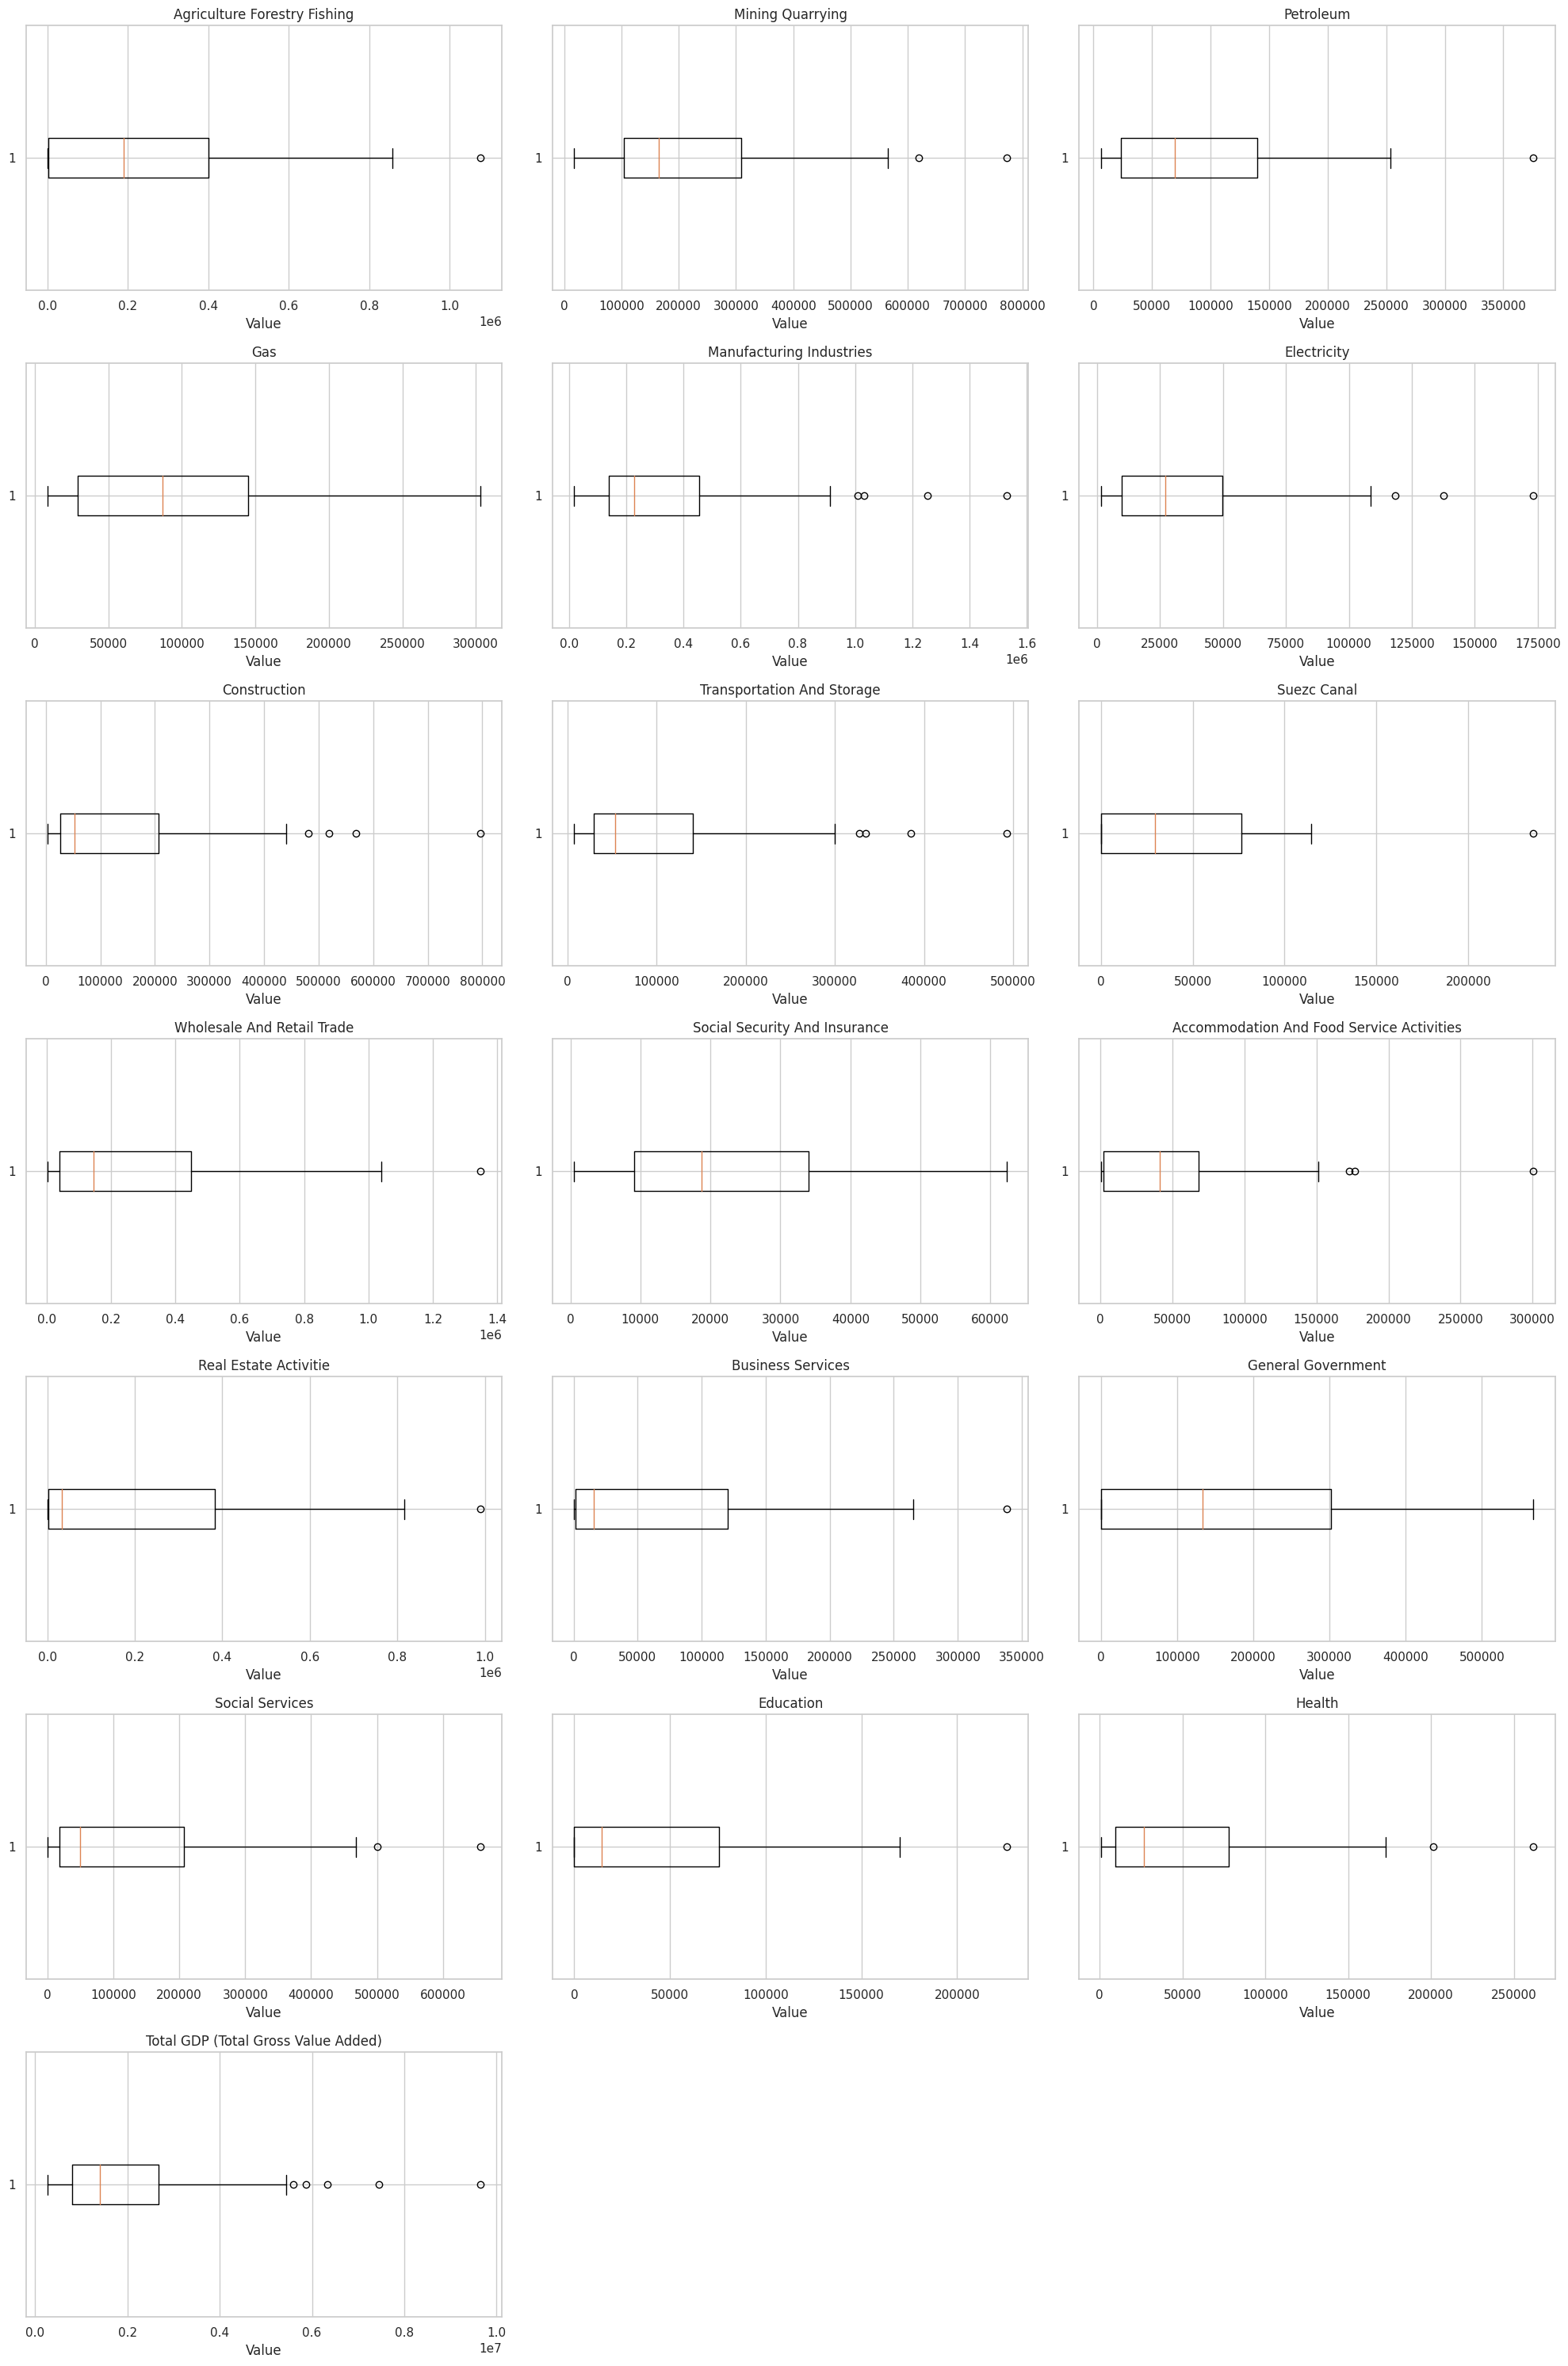

In [242]:
# List of columns to analyze
columns_to_analyze = [
    'Agriculture Forestry Fishing', 'Mining Quarrying', 'Petroleum', 'Gas', 'Manufacturing Industries', 'Electricity',
    'Construction', 'Transportation And Storage',
    'Suezc Canal', 'Wholesale And Retail Trade',
    'Social Security And Insurance', 'Accommodation And Food Service Activities',
    'Real Estate Activitie', 'Business Services', 'General Government',
    'Social Services', 'Education', 'Health',
    'Total GDP (Total Gross Value Added)'
]

# Generate box and whisker plots for each column
plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(len(columns_to_analyze) // 3 + 1, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [243]:
# Apply the IQR method to replace outliers for each column in columns_to_analyze
for column in columns_to_analyze:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers in the column with bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Display the dataframe
df.head()

,Indicator,Source,Year,Sector,Unit,Agriculture Forestry Fishing,Mining Quarrying,Petroleum,Gas,Other Extraction,...,Accommodation And Food Service Activities,Real Estate Activitie,Real Estate Ownership,Business Services,General Government,Social Services,Education,Health,Other Services,Total GDP (Total Gross Value Added)
0,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2023,Total,Million EGP,1000372.325,617200.90,315320.45,261978.20,135092.50,...,167705.61,954719.38,651307.40,298887.15,567371.5,489931.81,189477.50,180036.60,168508.60,5488912.425
1,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022,Public,Million EGP,1580.490,400745.97,218567.64,177437.88,4740.45,...,3583.06,4651.74,3817.49,834.25,488464.5,31752.55,0.00,30503.53,1249.02,1859954.520
2,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022,Private,Million EGP,856840.230,164816.02,35268.04,30739.85,98808.13,...,167705.61,810434.12,546028.59,264405.53,0.0,468074.06,169983.71,170840.40,127249.95,5488912.425
3,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2022,Total,Million EGP,858420.720,565561.99,253835.68,208177.73,103548.58,...,167705.61,815085.85,549846.08,265239.78,488464.5,489931.81,169983.71,180036.60,128498.96,5488912.425
4,"Gross Value Added at factor cost, current prices",Ministry of Planning and Economic Development,2021,Public,Million EGP,1391.060,278354.46,140184.50,133986.80,4183.16,...,2225.96,4118.39,3383.87,734.52,437417.4,27739.03,0.00,26640.78,1098.25,1538913.040


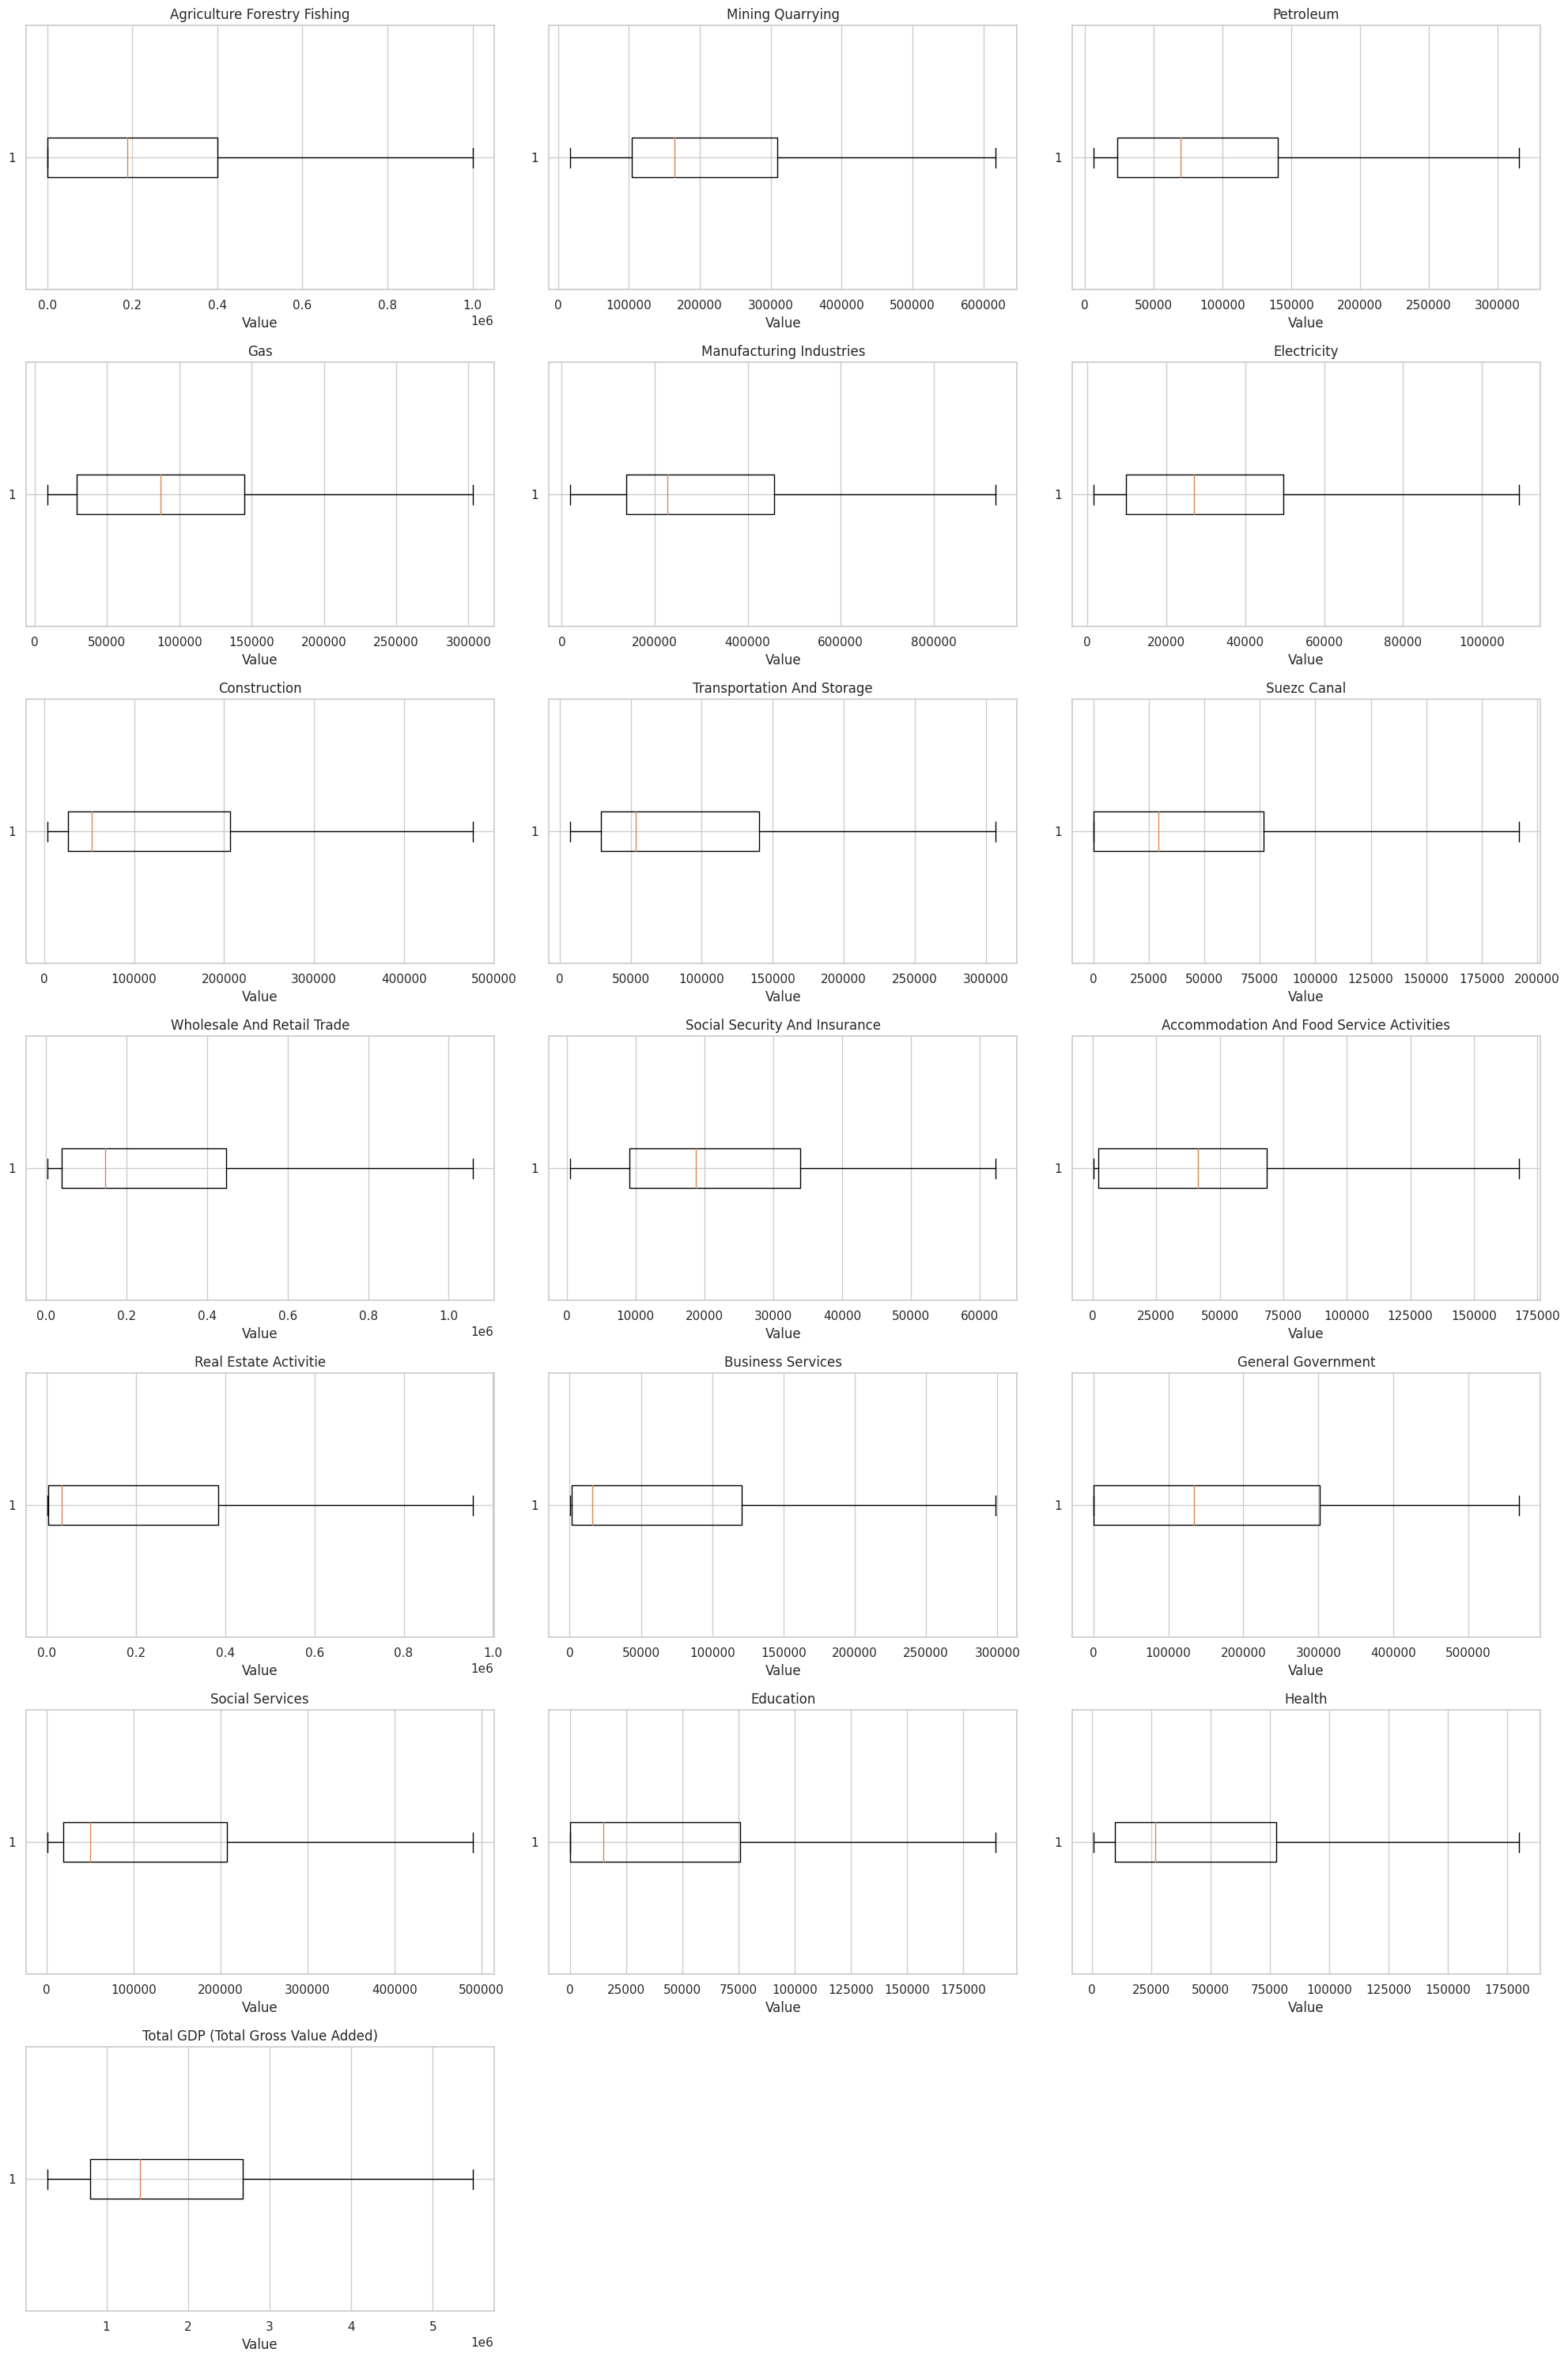

In [244]:
# List of columns to analyze
columns_to_analyze = [
    'Agriculture Forestry Fishing', 'Mining Quarrying', 'Petroleum', 'Gas', 'Manufacturing Industries', 'Electricity',
    'Construction', 'Transportation And Storage',
    'Suezc Canal', 'Wholesale And Retail Trade',
    'Social Security And Insurance', 'Accommodation And Food Service Activities',
    'Real Estate Activitie', 'Business Services', 'General Government',
    'Social Services', 'Education', 'Health',
    'Total GDP (Total Gross Value Added)'
]

# Generate box and whisker plots for each column
plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(len(columns_to_analyze) // 3 + 1, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

## Data Analysis and Visualization:

Sector-wise Analysis:
- The data was analyzed for each economic sector represented in the dataset
- This involved observing trends in each sector's performance across different years.

Visualization:
- The analysis was complemented by creating visualizations such as charts and graphs.
- These visuals helped identify patterns and trends in economic performance before, during, and after the upheaval events.


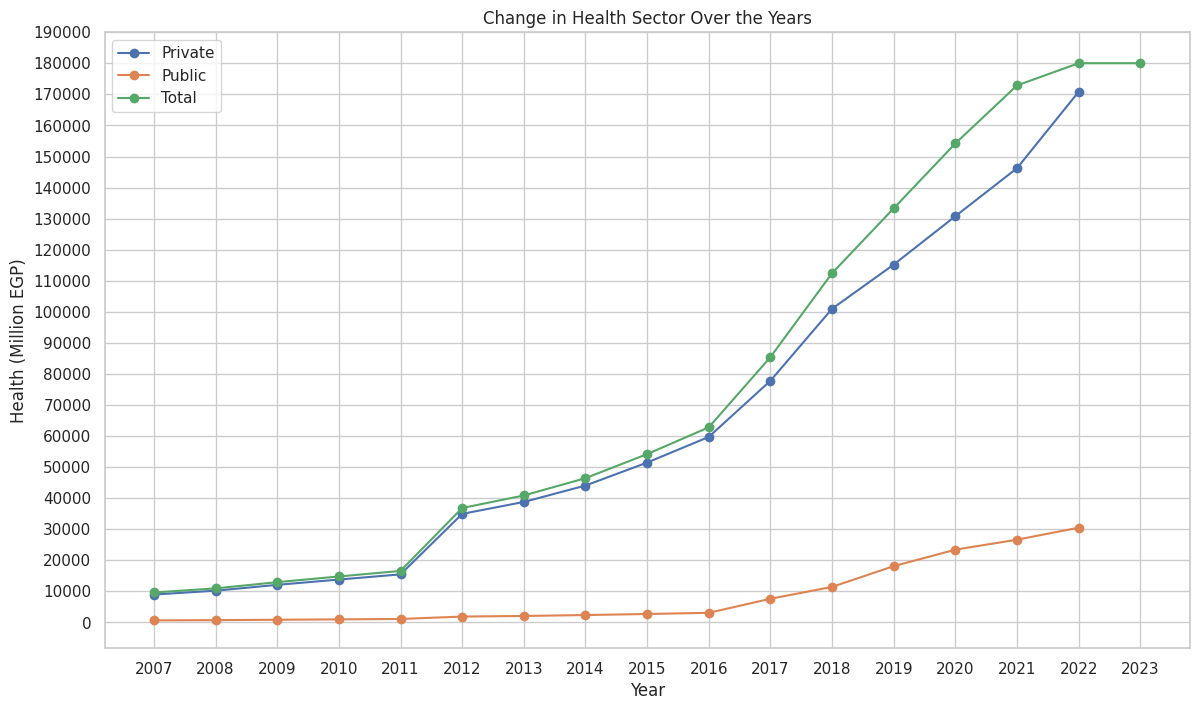

In [245]:
#health change over the years
df_health = df[['Year', 'Sector', 'Health']]



# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_health.pivot(index='Year', columns='Sector', values='Health')

# Plot the data
plt.figure(figsize=(14, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Change in Health Sector Over the Years')
plt.xlabel('Year')
plt.ylabel('Health (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

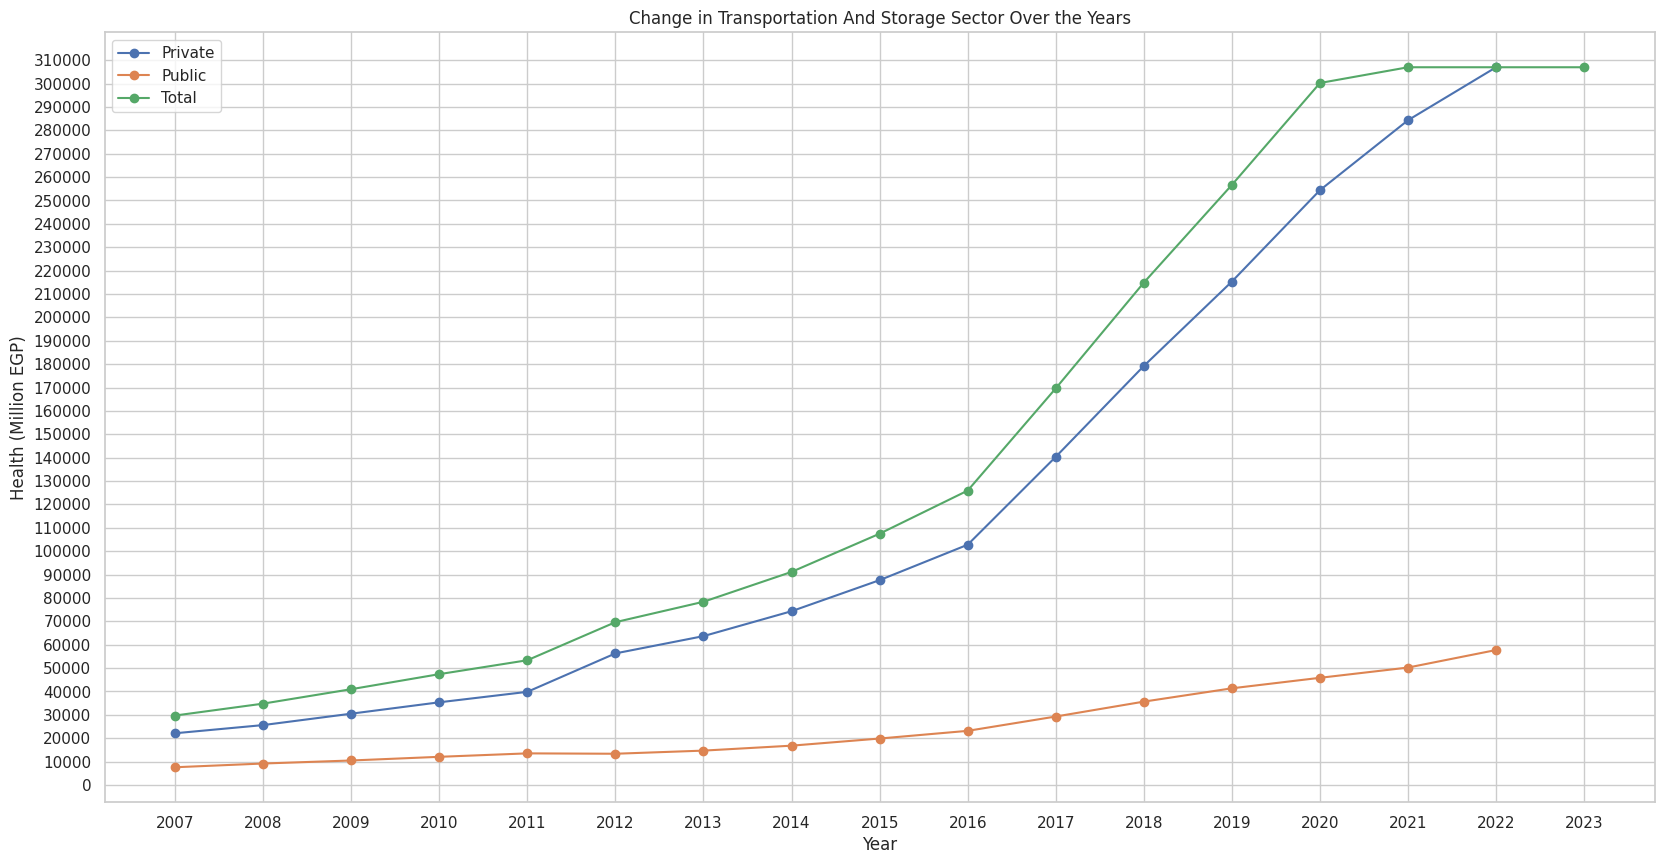

In [246]:
#transportaion

df_TransportationAndStorage = df[['Year', 'Sector', 'Transportation And Storage']]



# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_TransportationAndStorage.pivot(index='Year', columns='Sector', values='Transportation And Storage')

# Plot the data
plt.figure(figsize=(20, 10))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Change in Transportation And Storage Sector Over the Years')
plt.xlabel('Year')
plt.ylabel('Health (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

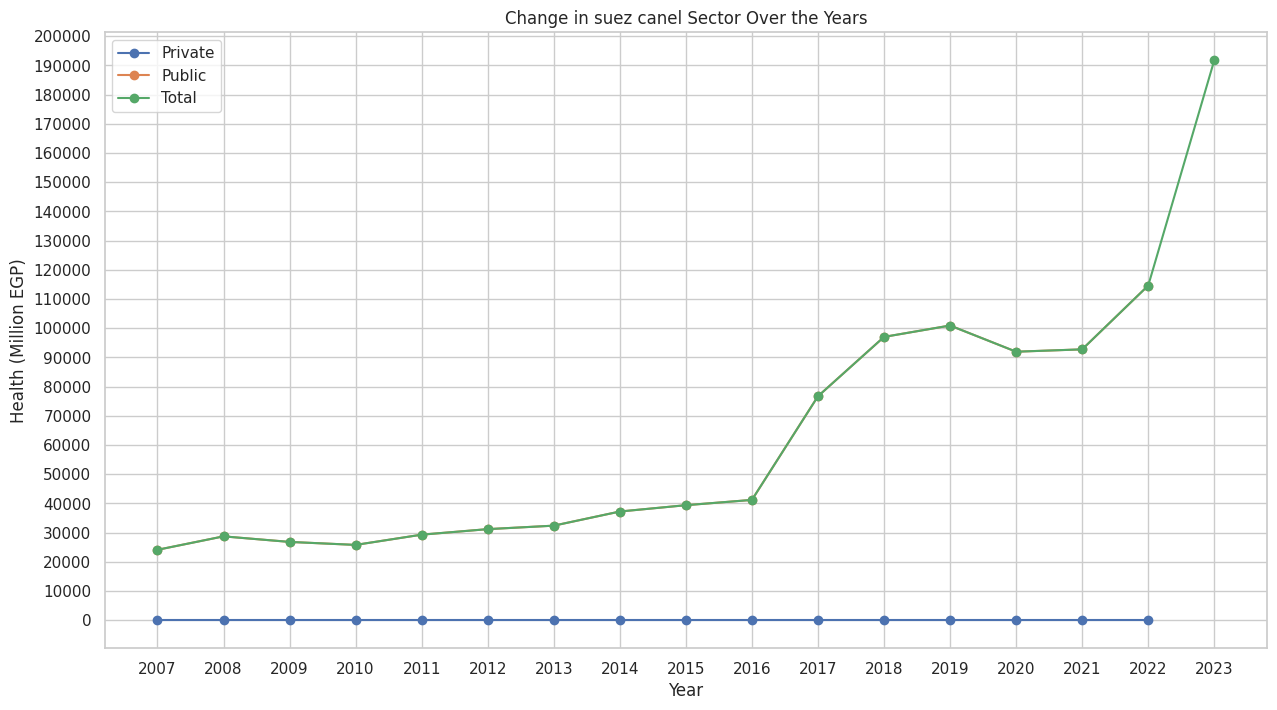

In [247]:
df_SuezcCanal = df[['Year', 'Sector', 'Suezc Canal']]



# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_SuezcCanal.pivot(index='Year', columns='Sector', values='Suezc Canal')

# Plot the data
plt.figure(figsize=(15, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Change in suez canel Sector Over the Years')
plt.xlabel('Year')
plt.ylabel('Health (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

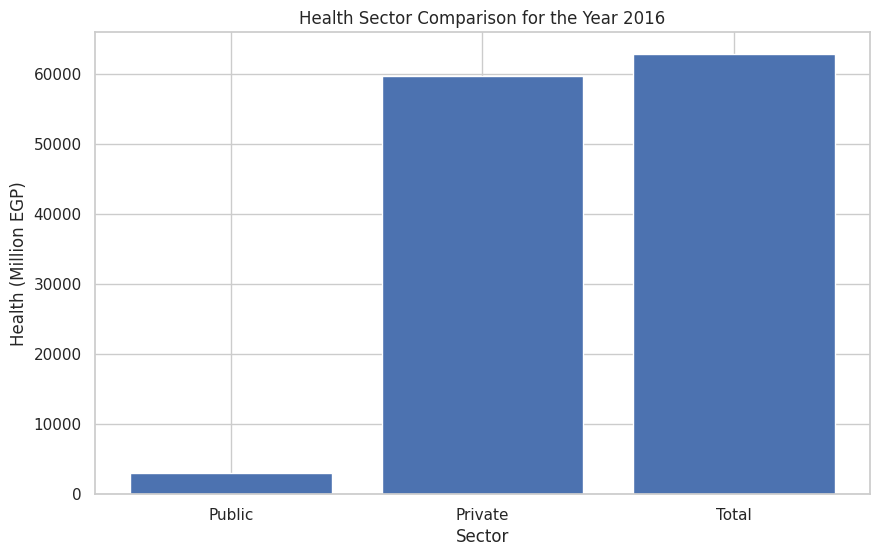

In [248]:
df_health = df[['Year', 'Sector', 'Health']]


# Bar Chart: Health Sector Comparison for the Year 2016
year = 2016
df_year = df_health[df_health['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Health'])
plt.title(f'Health Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Health (Million EGP)')

plt.show()

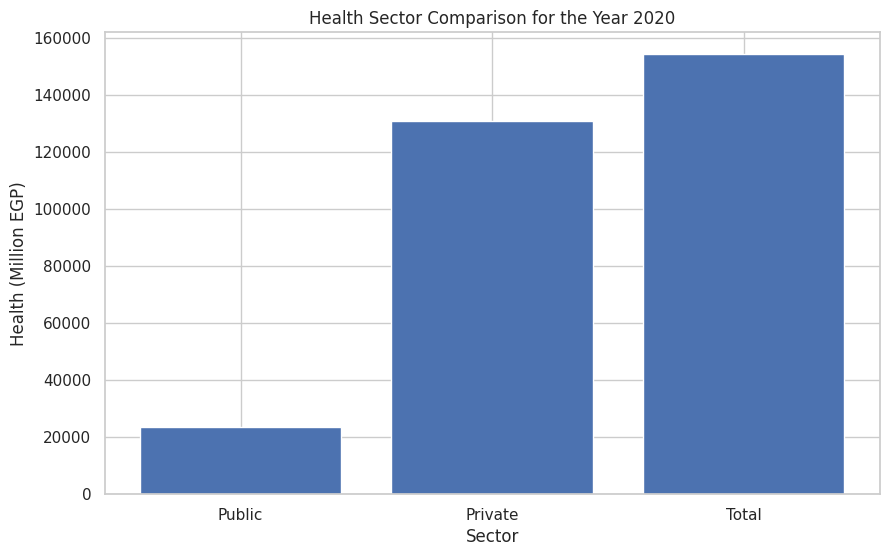

In [249]:
df_health = df[['Year', 'Sector', 'Health']]


# Bar Chart: Health Sector Comparison for the Year 2020
year = 2020
df_year = df_health[df_health['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Health'])
plt.title(f'Health Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Health (Million EGP)')

plt.show()

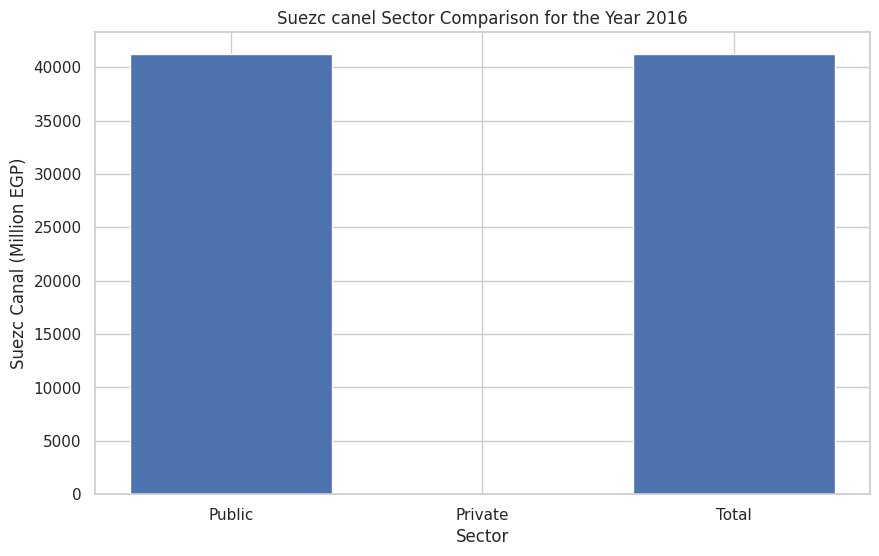

In [250]:
# Bar Chart: Suez Canal Sector Comparison for the Year 2016
year = 2016
df_year = df_SuezcCanal[df_SuezcCanal['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Suezc Canal'])
plt.title(f'Suezc canel Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Suezc Canal (Million EGP)')

plt.show()

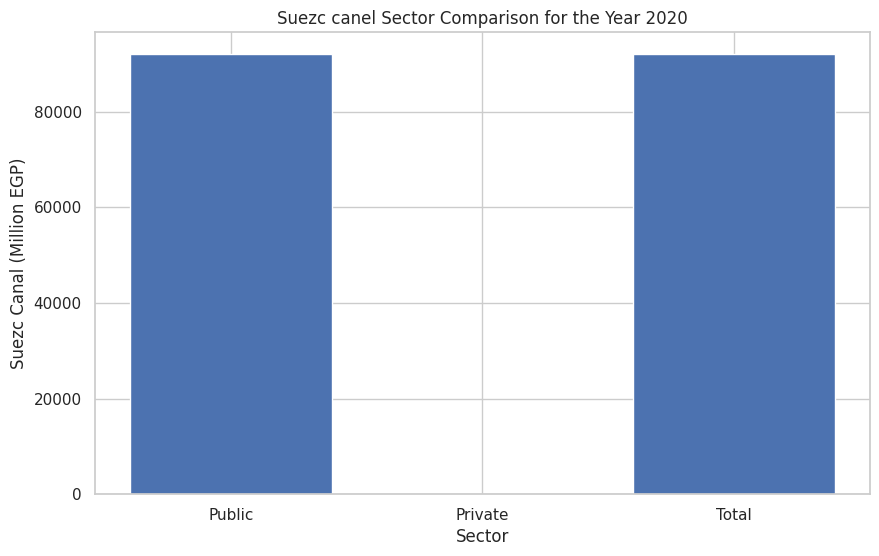

In [251]:
# Bar Chart: Suez Canal Sector Comparison for the Year 2020
year = 2020
df_year = df_SuezcCanal[df_SuezcCanal['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Suezc Canal'])
plt.title(f'Suezc canel Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Suezc Canal (Million EGP)')

plt.show()

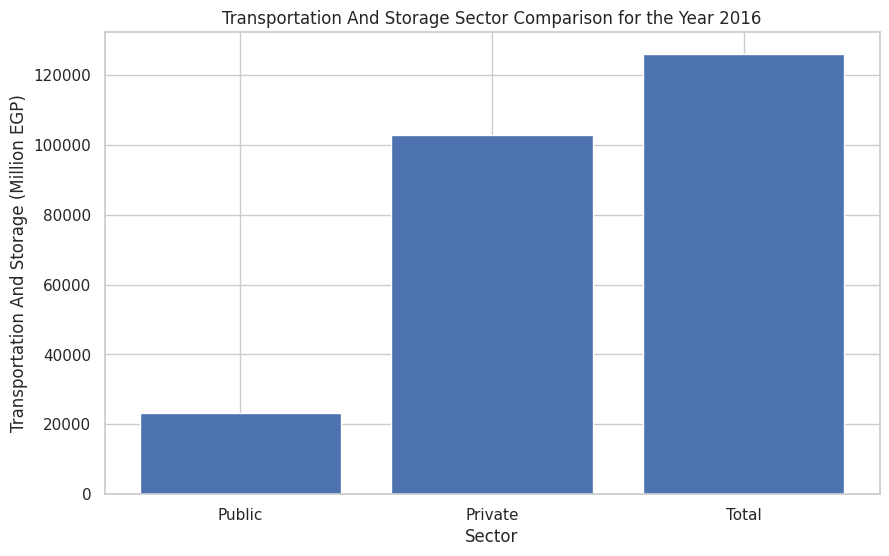

In [252]:
# Bar Chart: Transportation Sector Comparison for the Year 2023
year = 2016
df_year = df_TransportationAndStorage[df_SuezcCanal['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Transportation And Storage'])
plt.title(f'Transportation And Storage Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Transportation And Storage (Million EGP)')

plt.show()

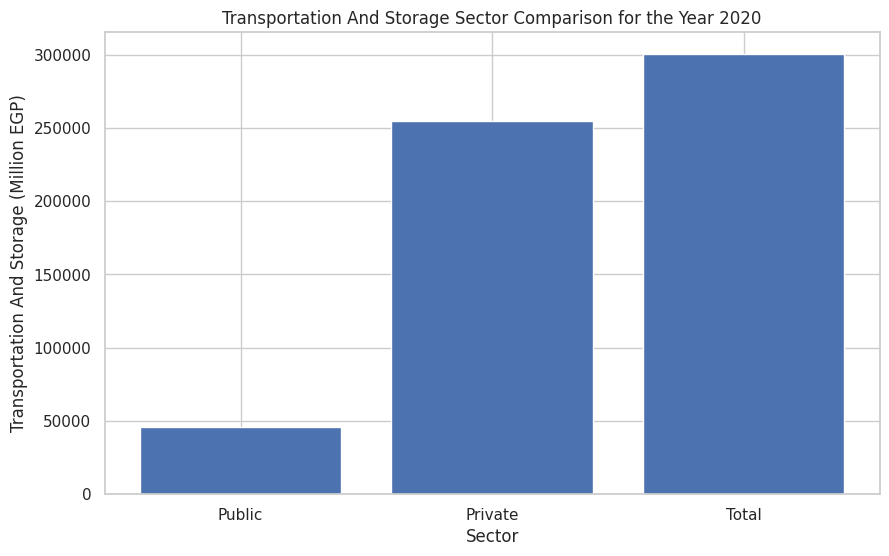

In [253]:
# Bar Chart: Health Sector Comparison for the Year 2020
year = 2020
df_year = df_TransportationAndStorage[df_SuezcCanal['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Transportation And Storage'])
plt.title(f'Transportation And Storage Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Transportation And Storage (Million EGP)')

plt.show()

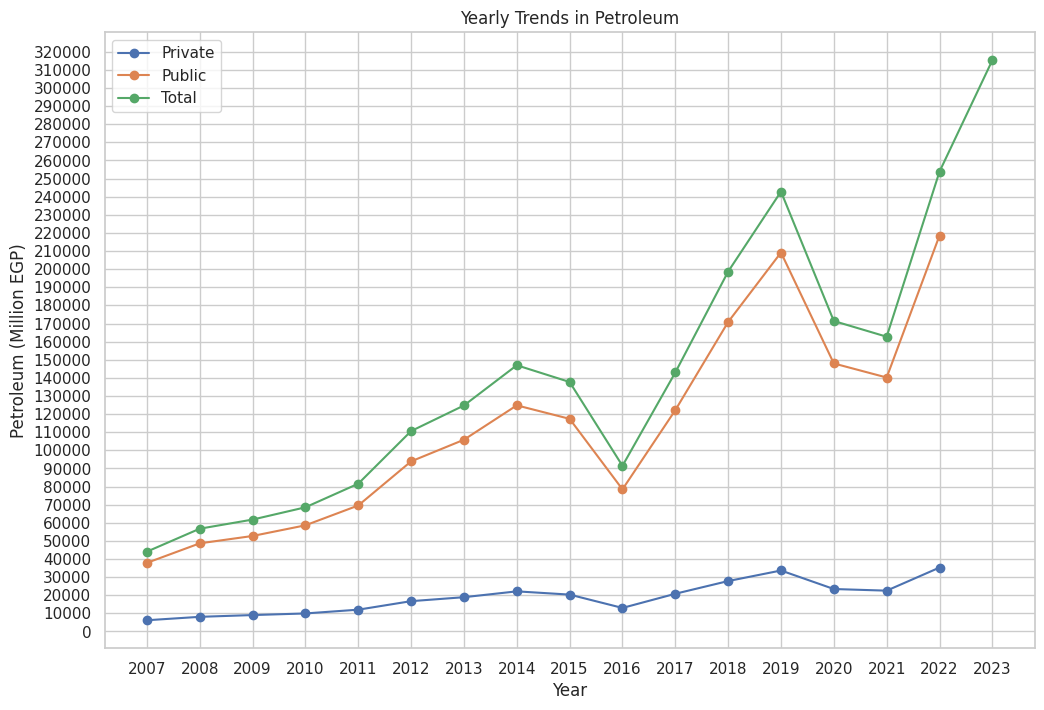

In [254]:
df_Petroleum = df[['Year', 'Sector', 'Petroleum']]



# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_Petroleum.pivot(index='Year', columns='Sector', values='Petroleum')

# Plot the data
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Petroleum')
plt.xlabel('Year')
plt.ylabel('Petroleum (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

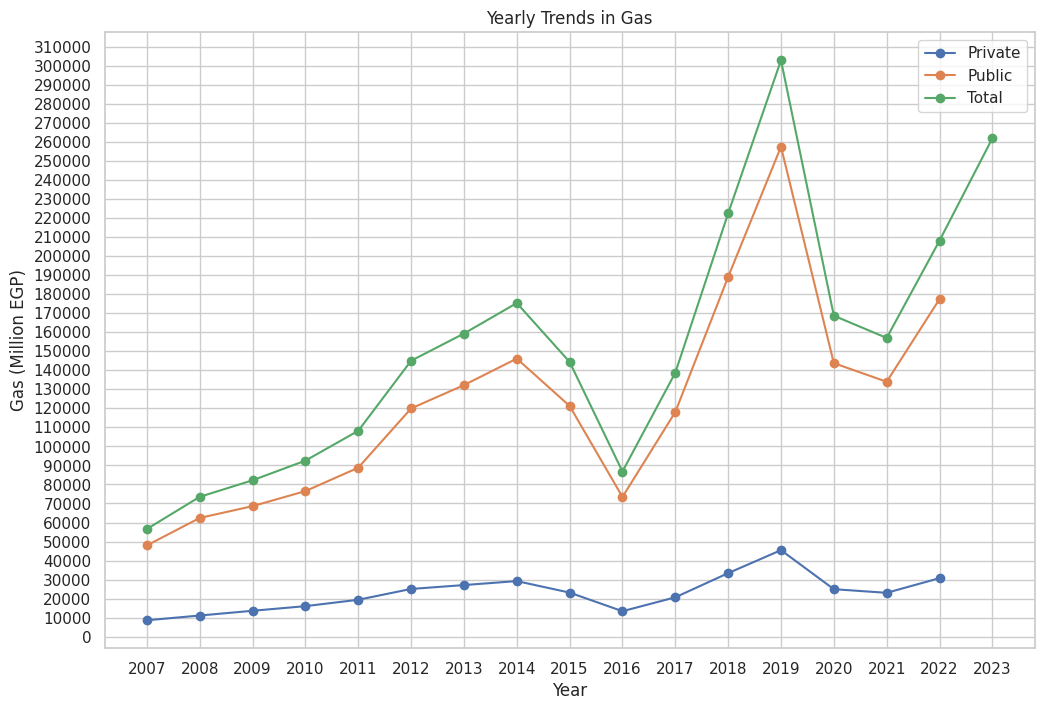

In [255]:
df_Gas = df[['Year', 'Sector', 'Gas']]

# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_Gas.pivot(index='Year', columns='Sector', values='Gas')

# Plot the data
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Gas')
plt.xlabel('Year')
plt.ylabel('Gas (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

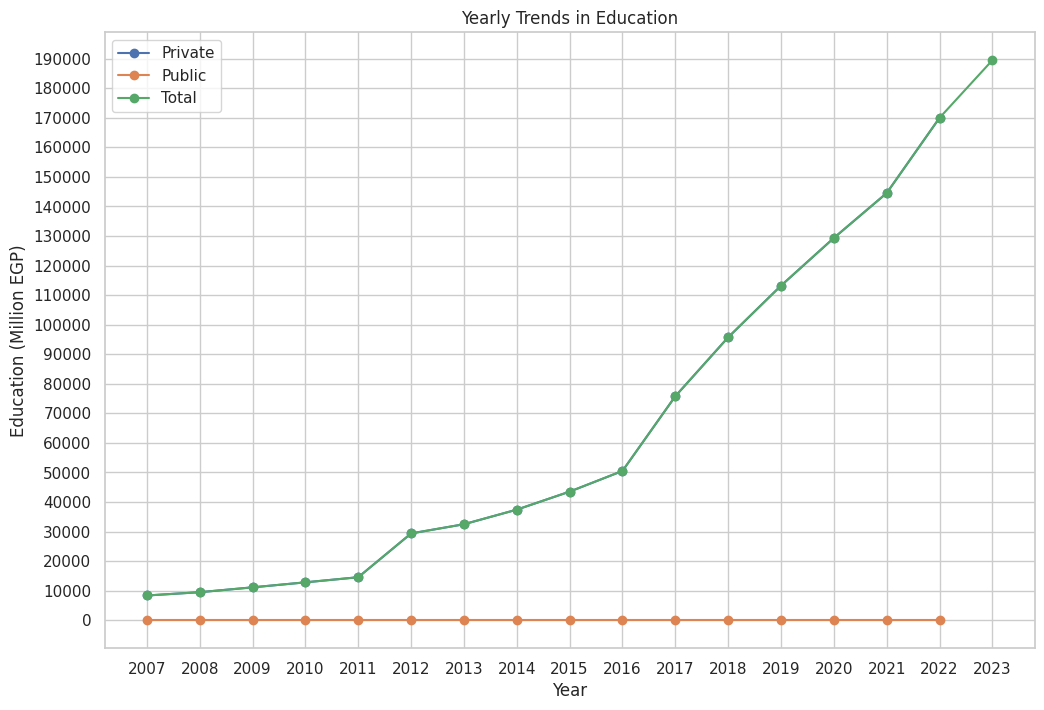

In [256]:
df_Education = df[['Year', 'Sector', 'Education']]
# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_Education.pivot(index='Year', columns='Sector', values='Education')

# Plot the data
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Education')
plt.xlabel('Year')
plt.ylabel('Education (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

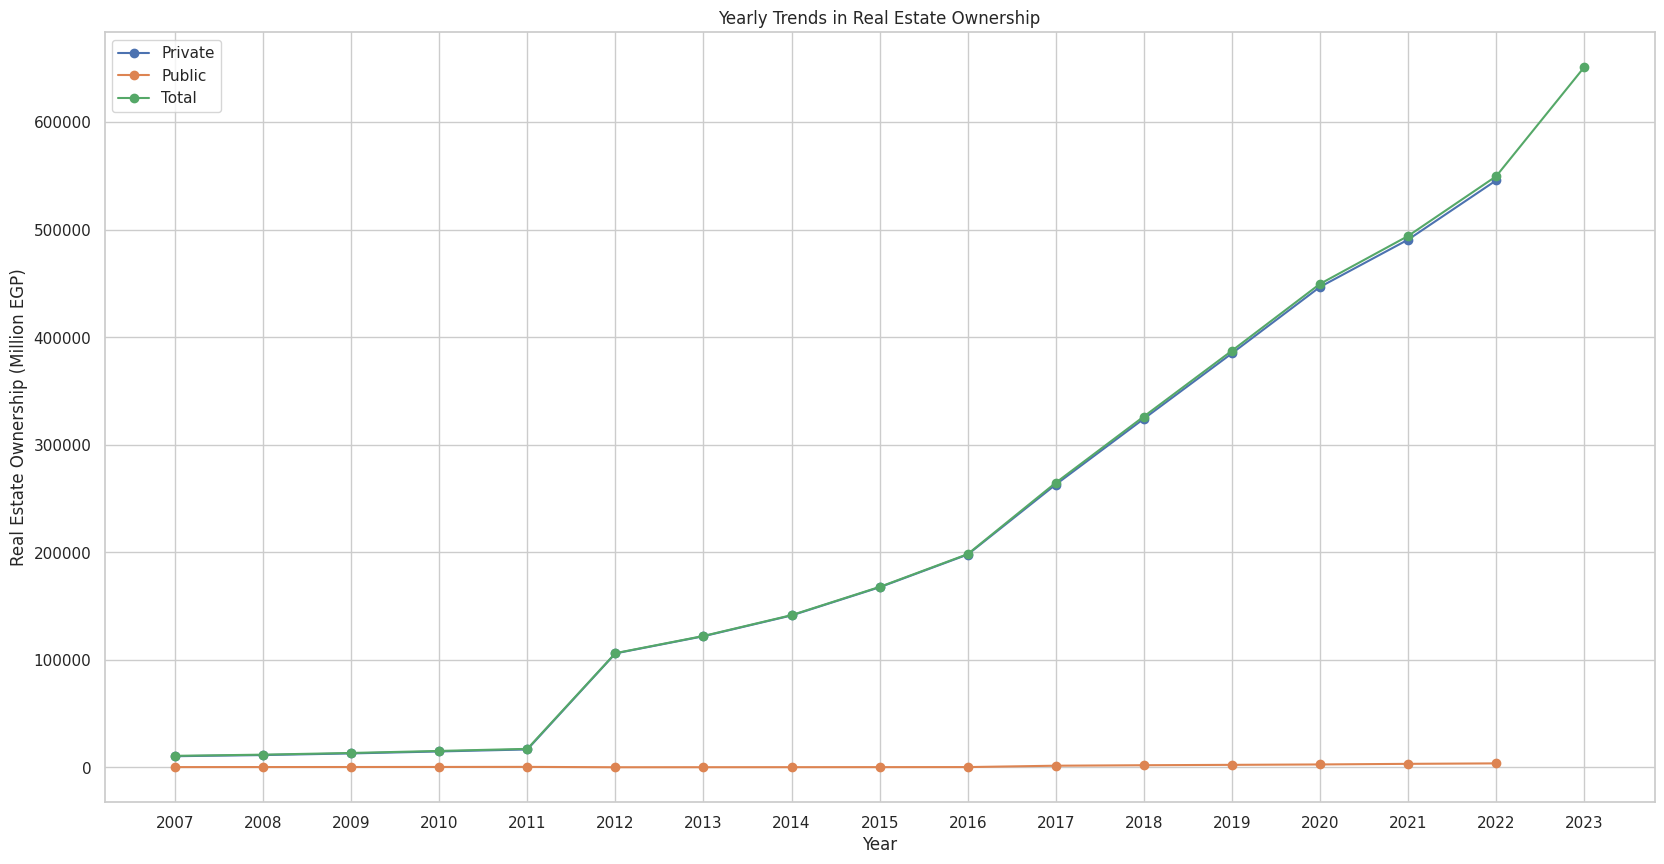

In [257]:
df_RealEstateOwnership = df[['Year', 'Sector', 'Real Estate Ownership']]
# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_RealEstateOwnership.pivot(index='Year', columns='Sector', values='Real Estate Ownership')

# Plot the data
plt.figure(figsize=(20, 10))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Real Estate Ownership')
plt.xlabel('Year')
plt.ylabel('Real Estate Ownership (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 100000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


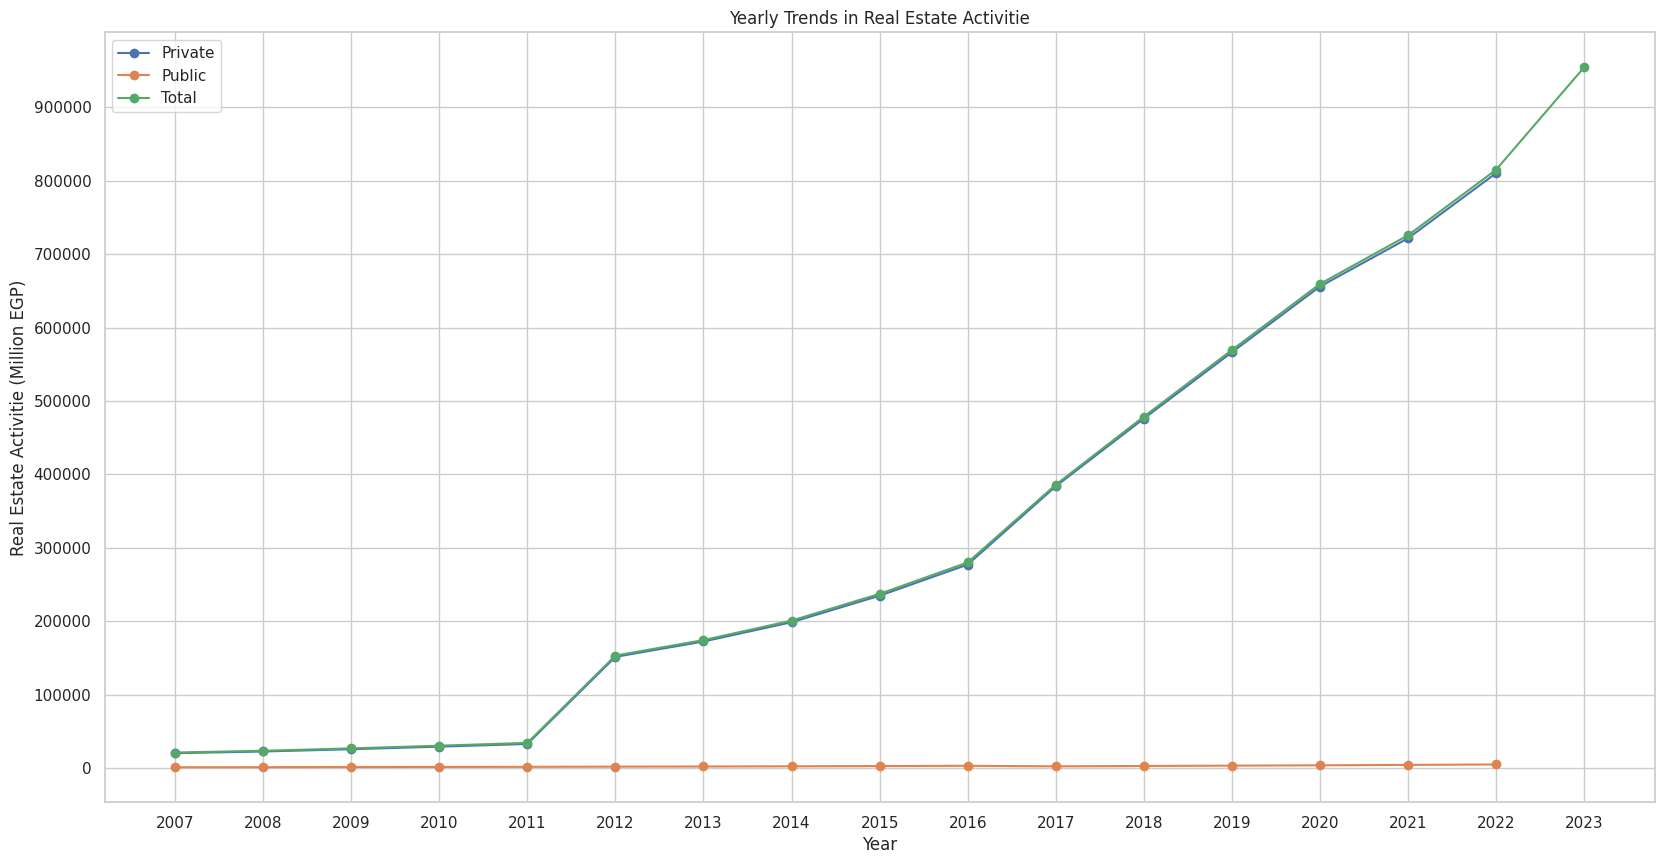

In [258]:

df_RealEstateActivitie= df[['Year', 'Sector', 'Real Estate Activitie']]
# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_RealEstateActivitie.pivot(index='Year', columns='Sector', values='Real Estate Activitie')

# Plot the data
plt.figure(figsize=(20, 10))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Real Estate Activitie')
plt.xlabel('Year')
plt.ylabel('Real Estate Activitie (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 100000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

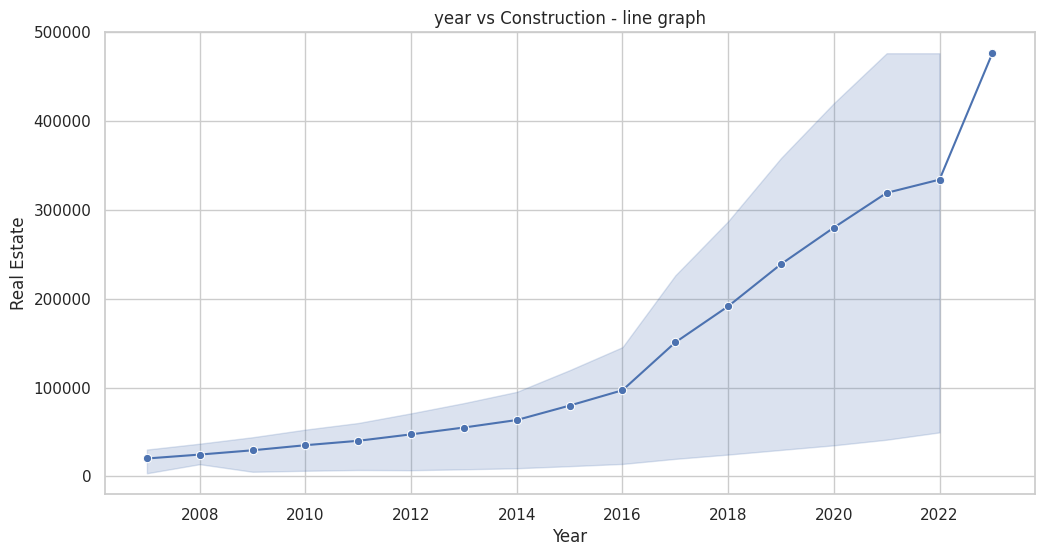

In [259]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Construction", data=df, marker='o')
plt.title("year vs Construction - line graph")
plt.xlabel("Year")
plt.ylabel("Real Estate")
plt.grid(True)
plt.show()

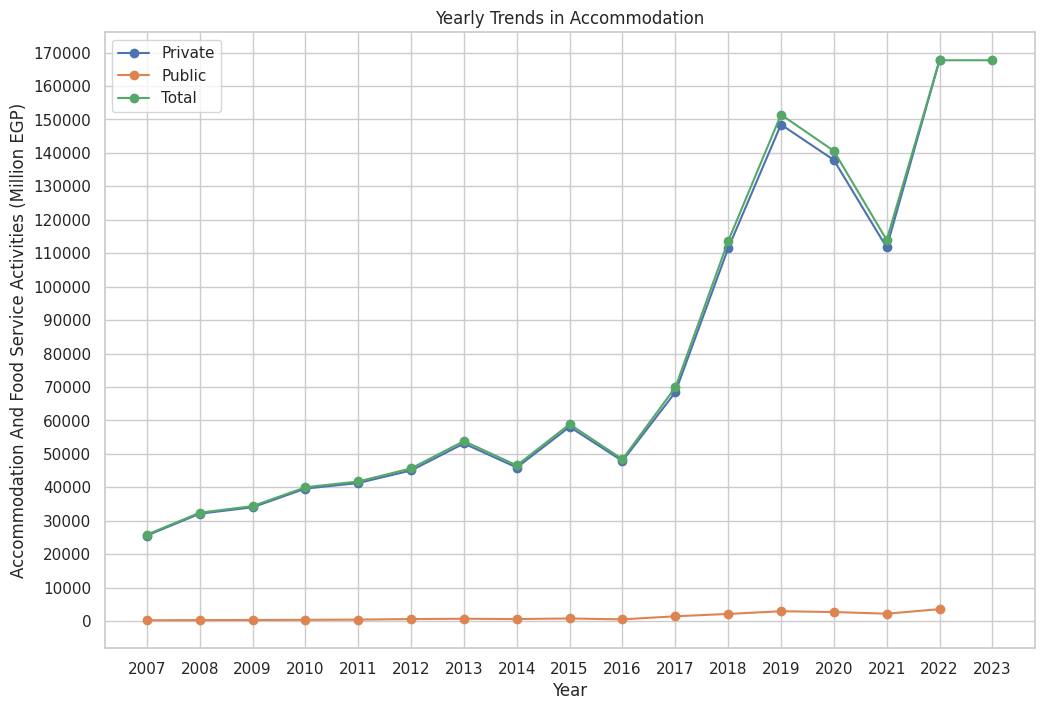

In [260]:

df_accomodation= df[['Year', 'Sector', 'Accommodation And Food Service Activities']]
# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_accomodation.pivot(index='Year', columns='Sector', values='Accommodation And Food Service Activities')

# Plot the data
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Accommodation')
plt.xlabel('Year')
plt.ylabel('Accommodation And Food Service Activities (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 10000, 10000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

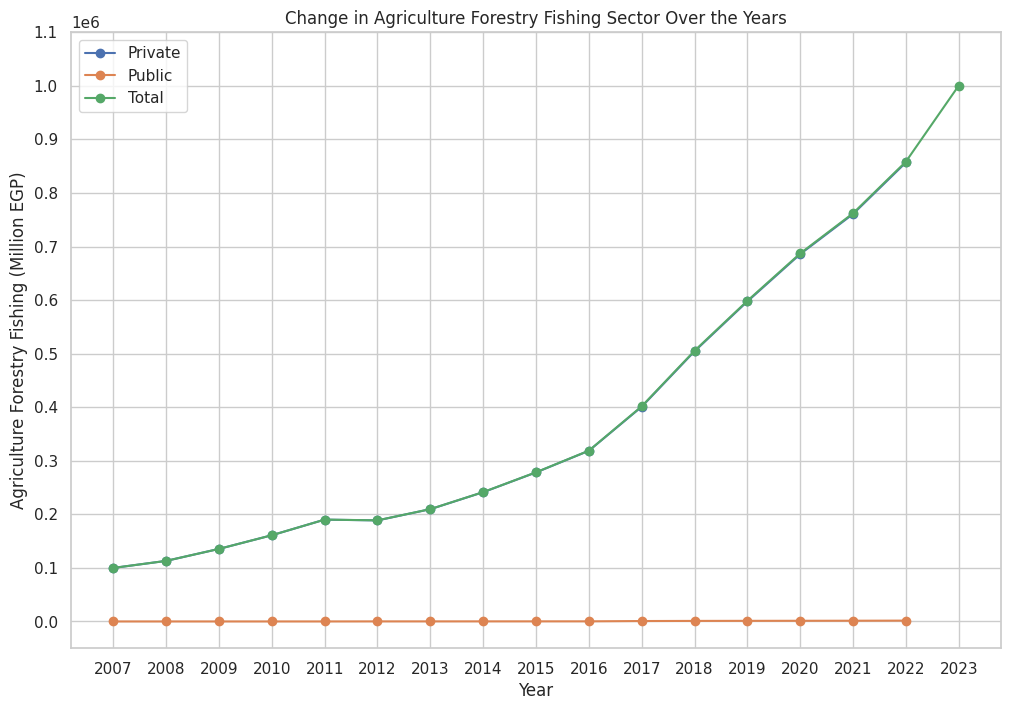

In [261]:
df_agriculture = df[['Year', 'Sector', 'Agriculture Forestry Fishing']]



# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_agriculture.pivot(index='Year', columns='Sector', values='Agriculture Forestry Fishing')

# Plot the data
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Change in Agriculture Forestry Fishing Sector Over the Years')
plt.xlabel('Year')
plt.ylabel('Agriculture Forestry Fishing (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 100000, 100000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


## Sector Correlation Analysis:
Egyptian economic sectors show strong correlations.
- Manufacturing, social services, and utilities move together due to supply chains, policy, and infrastructure links.
- Financial and business services are also closely tied.

Others have moderate/low correlations:
- The Suez Canal and social security have more varied correlations, reflecting their unique roles in the economy.

In [262]:
# Calculate the correlation between Education and Health
correlation_value = df['Education'].corr(df['Health'])

# Print the correlation result
print(f"The correlation between Education and Health is: {correlation_value:.3f}")

The correlation between Education and Health is: 0.989


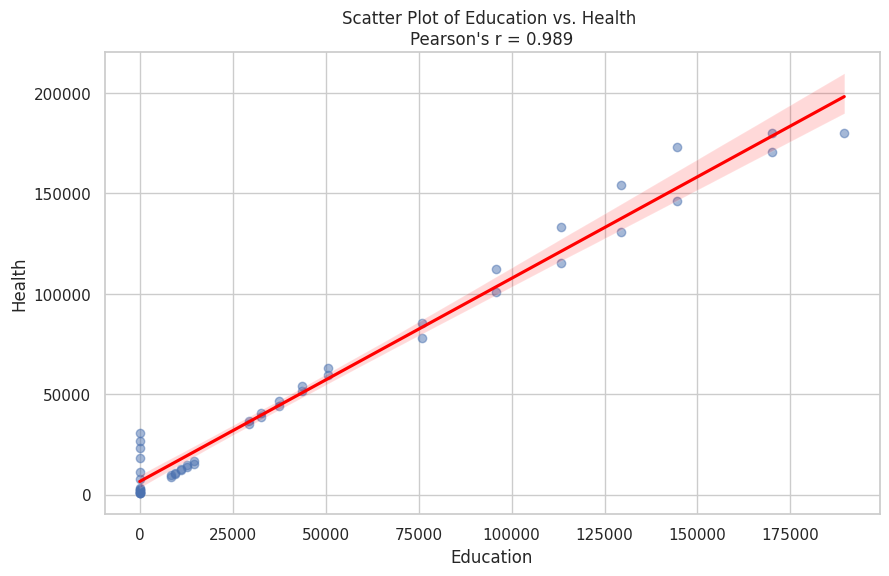

In [263]:
# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Education', y='Health', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Scatter Plot of Education vs. Health \nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Education')
plt.ylabel('Health')
plt.grid(True)
plt.show()

In [264]:
#  Calculate the correlation between Petroleum and Gas
correlation_value = df['Petroleum'].corr(df['Gas'])

#  Print the correlation result
print(f"The correlation between Petroleum and Gas is: {correlation_value:.3f}")

The correlation between Petroleum and Gas is: 0.964


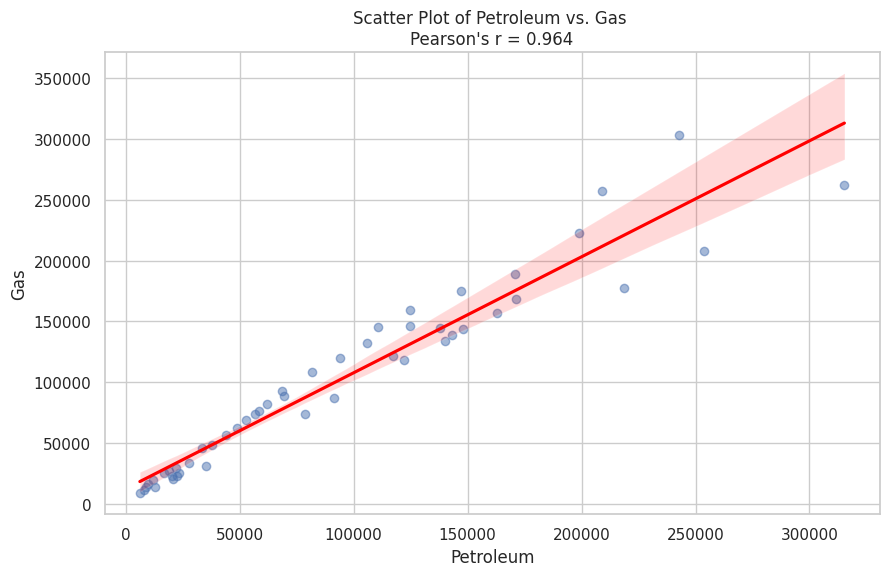

In [265]:

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Petroleum', y='Gas', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Scatter Plot of Petroleum vs. Gas \nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Petroleum')
plt.ylabel('Gas')
plt.grid(True)
plt.show()

In [266]:
#  Calculate the correlation between Suez Canal and Education
correlation_value = df['Suezc Canal'].corr(df['Education'])

#  Print the correlation result
print(f"The correlation between Suez Canal and Education is: {correlation_value:.3f}")

The correlation between Suez Canal and Education is: 0.261


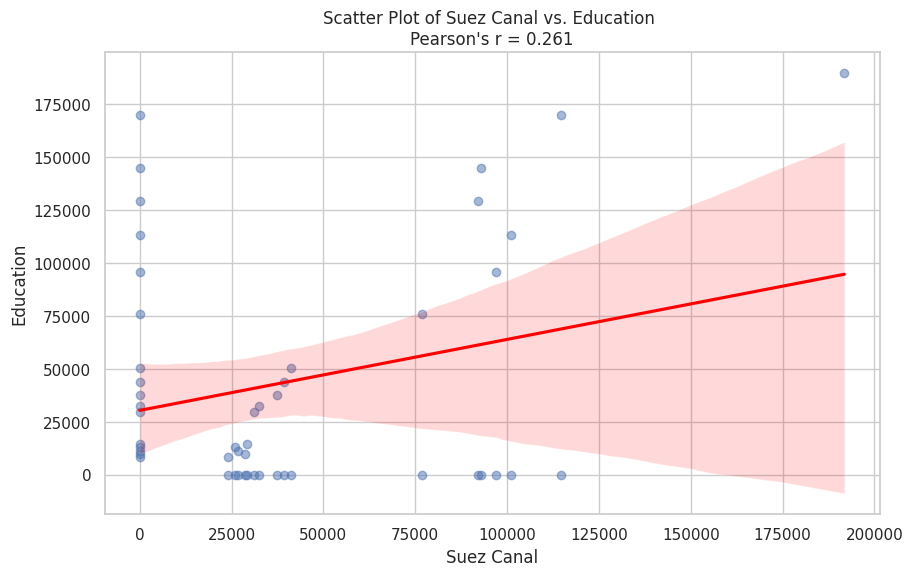

In [267]:

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Suezc Canal', y='Education', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Scatter Plot of Suez Canal vs. Education \nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Suez Canal')
plt.ylabel('Education')
plt.grid(True)
plt.show()

In [269]:
# Filter the data to include only rows where the Sector is 'Total'
total_gva_data = df[df['Sector'] == 'Total']

# Drop unnecessary columns for correlation analysis
columns_to_drop = ['Indicator', 'Source', 'Year', 'Sector', 'Unit', 'Total GDP (Total Gross Value Added)']
gva_data_for_correlation = total_gva_data.drop(columns=columns_to_drop)

# Compute the correlation matrix
correlation_matrix = gva_data_for_correlation.corr()

# Display the correlation matrix
correlation_matrix

,Agriculture Forestry Fishing,Mining Quarrying,Petroleum,Gas,Other Extraction,Manufacturing Industries,petroleum Refining,Other Manufacturing,Electricity,Water Sewerage Remediation Activitie,...,Social Security And Insurance,Accommodation And Food Service Activities,Real Estate Activitie,Real Estate Ownership,Business Services,General Government,Social Services,Education,Health,Other Services
Agriculture Forestry Fishing,1.000000,0.883400,0.905686,0.744270,0.991594,0.954197,0.977381,0.997008,0.955758,0.988099,...,0.667647,0.958028,0.993430,0.991470,0.995893,0.981851,0.992596,0.997302,0.983944,0.987018
Mining Quarrying,0.883400,1.000000,0.981229,0.963048,0.902874,0.907759,0.898146,0.896568,0.902957,0.909562,...,0.432585,0.938557,0.901075,0.902162,0.897716,0.891695,0.885918,0.895316,0.892668,0.845565
Petroleum,0.905686,0.981229,1.000000,0.929674,0.928422,0.879288,0.922952,0.922663,0.875547,0.932578,...,0.497720,0.932081,0.915085,0.915801,0.910952,0.912386,0.890000,0.911703,0.884780,0.882941
Gas,0.744270,0.963048,0.929674,1.000000,0.773038,0.789209,0.762463,0.767340,0.782077,0.781404,...,0.335253,0.843849,0.764174,0.765891,0.759112,0.751430,0.741782,0.755597,0.752707,0.710240
Other Extraction,0.991594,0.902874,0.928422,0.773038,1.000000,0.950068,0.992832,0.990943,0.951668,0.997335,...,0.586681,0.946986,0.996784,0.996867,0.994450,0.987714,0.981981,0.993843,0.978590,0.972364
Manufacturing Industries,0.954197,0.907759,0.879288,0.789209,0.950068,1.000000,0.941839,0.950796,0.998860,0.957922,...,0.524635,0.952870,0.968126,0.968433,0.967886,0.957964,0.972014,0.962809,0.985568,0.912949
petroleum Refining,0.977381,0.898146,0.922952,0.762463,0.992832,0.941839,1.000000,0.973359,0.940350,0.989086,...,0.514980,0.927151,0.989783,0.991600,0.983971,0.990818,0.968280,0.981970,0.970606,0.943156
Other Manufacturing,0.997008,0.896568,0.922663,0.767340,0.990943,0.950796,0.973359,1.000000,0.953097,0.990126,...,0.676068,0.967158,0.990388,0.988227,0.992960,0.977309,0.987169,0.994721,0.976088,0.989048
Electricity,0.955758,0.902957,0.875547,0.782077,0.951668,0.998860,0.940350,0.953097,1.000000,0.959771,...,0.530501,0.954291,0.969927,0.969788,0.970613,0.954052,0.975401,0.965744,0.987165,0.919555
Water Sewerage Remediation Activitie,0.988099,0.909562,0.932578,0.781404,0.997335,0.957922,0.989086,0.990126,0.959771,1.000000,...,0.578809,0.948121,0.995523,0.995725,0.993093,0.989095,0.980892,0.992180,0.978144,0.968122


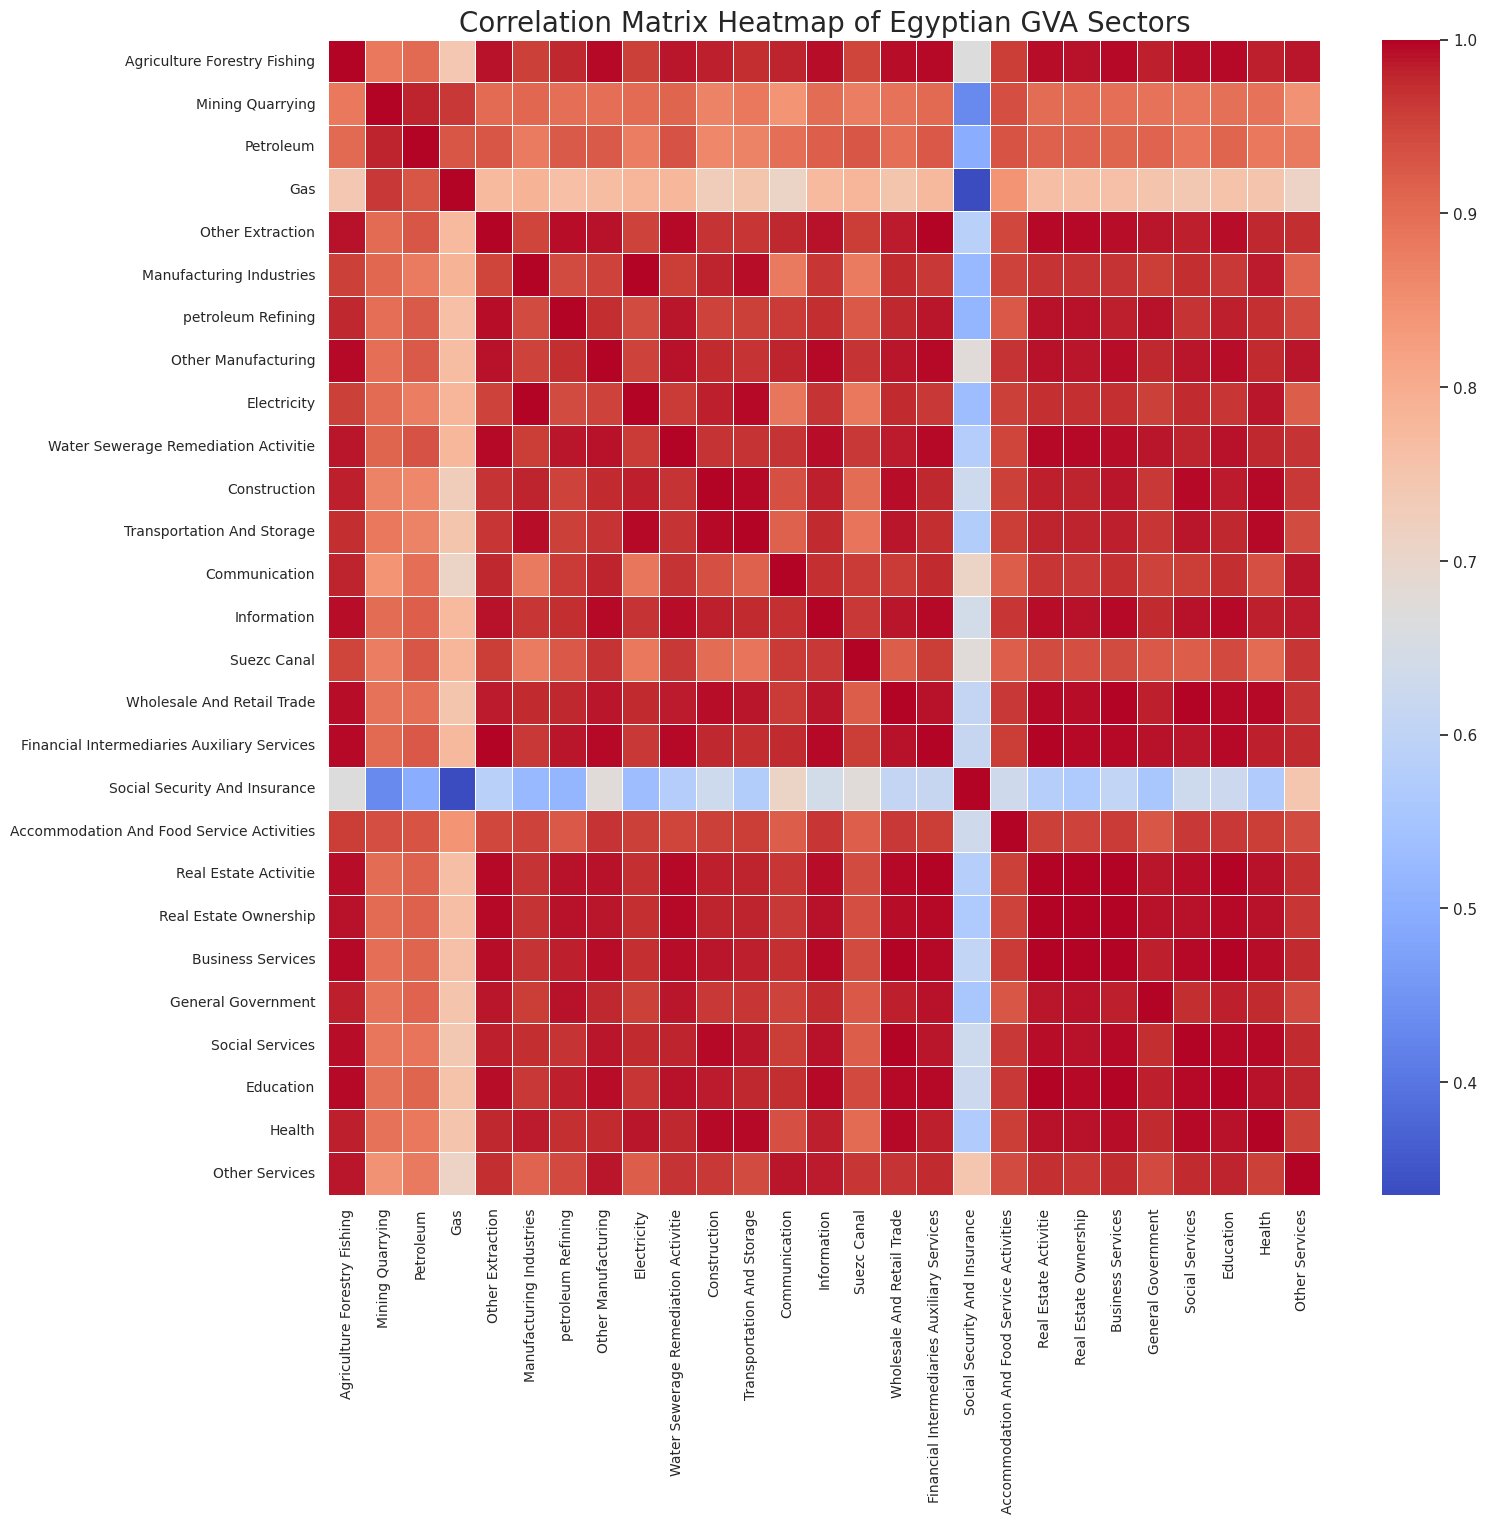

In [270]:
# Set the size of the heatmap
plt.figure(figsize=(16, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Enhancing the visualization
plt.title('Correlation Matrix Heatmap of Egyptian GVA Sectors', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Hypothesis Testing
Null Hypothesis (H₀):
-	There is no association between the occurrence of major upheavals (2011 revolution, 2013 revolution, 2020 pandemic) and the variations in Egypt's Gross Domestic Product (GDP).
- In simpler terms, the ups and downs of the Egyptian economy are not influenced by these upheavals.

Alternative Hypothesis (H₁):
-	There is an association between the occurrence of major upheavals (2011 revolution, 2013 revolution, 2020 pandemic) and the variations in Egypt's Gross Domestic Product (GDP).
- In other words, the upheavals have a statistically relevant impact on the Egyptian economy.


In [271]:
import pandas as pd
from scipy.stats import chi2_contingency



# Function to convert year ranges to average year
def convert_year_range(year):
    if isinstance(year, str) and '/' in year:
        years = year.split('/')
        return (int(years[0]) + int(years[1])) / 2
    return year

# Apply the conversion function to the 'Year' column
df['Year'] = df['Year'].apply(convert_year_range).astype(float)

# Categorize the Year into periods
df['Period'] = pd.cut(df['Year'],
                            bins=[-float('inf'), 2007, 2010, 2013, 2019, float('inf')],
                            labels=['Pre-2008', '2008-2010','2011-2013', '2014-2019', '2020-Present'])

# Categorize Total_GDP into bins
df['GDP_Bin'] = pd.qcut(df['Total GDP (Total Gross Value Added)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(df['Period'], df['GDP_Bin'])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the p-value
print("The p-value from the Chi-Square Test of Independence is:", p)

The p-value from the Chi-Square Test of Independence is: 5.5794647180362105e-05


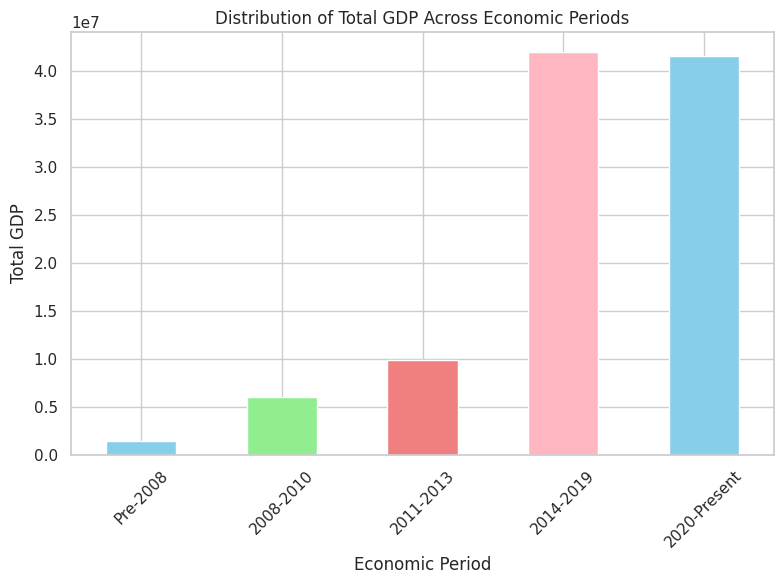

In [272]:
import matplotlib.pyplot as plt

# Assuming 'Period' column exists in gdp_data
period_groups = df.groupby('Period')['Total GDP (Total Gross Value Added)'].sum()  # Change aggregation function as needed

plt.figure(figsize=(8, 6))
period_groups.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.xlabel('Economic Period')
plt.ylabel('Total GDP')
plt.title('Distribution of Total GDP Across Economic Periods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many periods
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

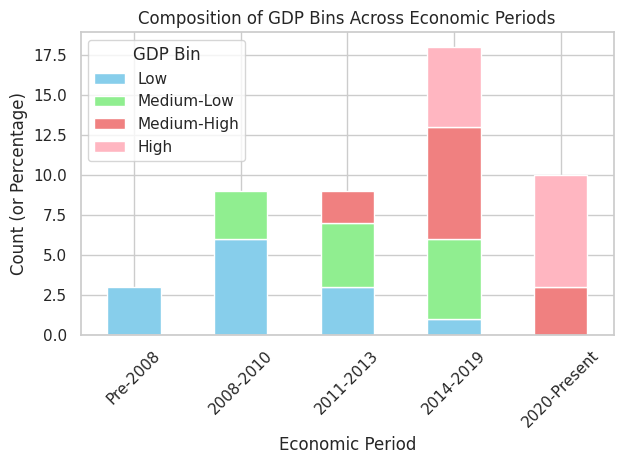

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.groupby(['Period', 'GDP_Bin'])['Total GDP (Total Gross Value Added)'].count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.xlabel('Economic Period')
plt.ylabel('Count (or Percentage)')
plt.title('Composition of GDP Bins Across Economic Periods')
plt.xticks(rotation=45)
plt.legend(title='GDP Bin')
plt.tight_layout()
plt.show()


## Conclusion
Test Results:
-	The chi-squared test yielded a statistically significant p-value of 5.5794647180362105e-05.
- The likelihood of observing such a strong association between upheavals and GDP changes by chance is extremely low (less than 0.05%).
-	Based on the statistically significant p-value, we can reject the null hypothesis.
-	This implies that there's a statistically significant association between the chosen upheavals and Egypt's GDP.

Sector analysis:
- The analysis of each sector has proven that each sector has its own criteria when it comes to global or natioanl upheavls. Some sectors get affected by only global upheavals. Other sectors get affected by local upheavals since some sectors are highly correlated to each other as proven.

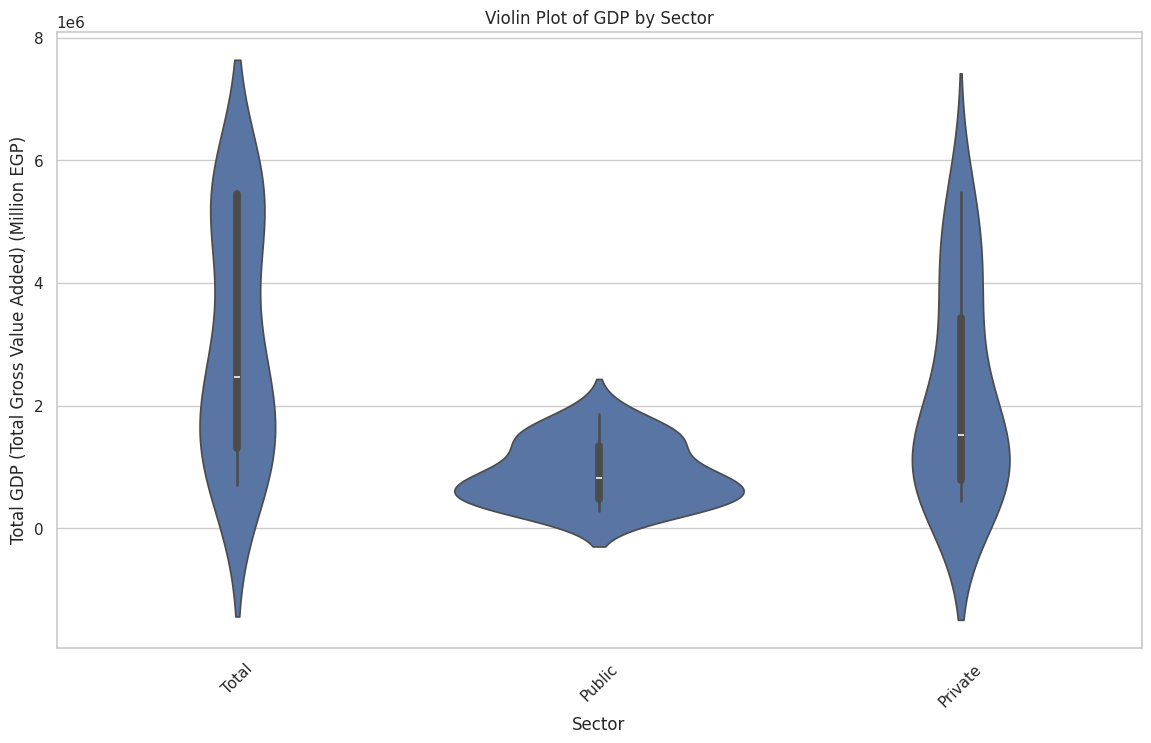

In [274]:

# Filter the data for the relevant columns
df_violin = df[['Sector', 'Total GDP (Total Gross Value Added)']]

# Plot a violin plot for GDP by sector
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sector', y='Total GDP (Total Gross Value Added)', data=df_violin)
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')
plt.title('Violin Plot of GDP by Sector')
plt.xticks(rotation=45)
plt.show()

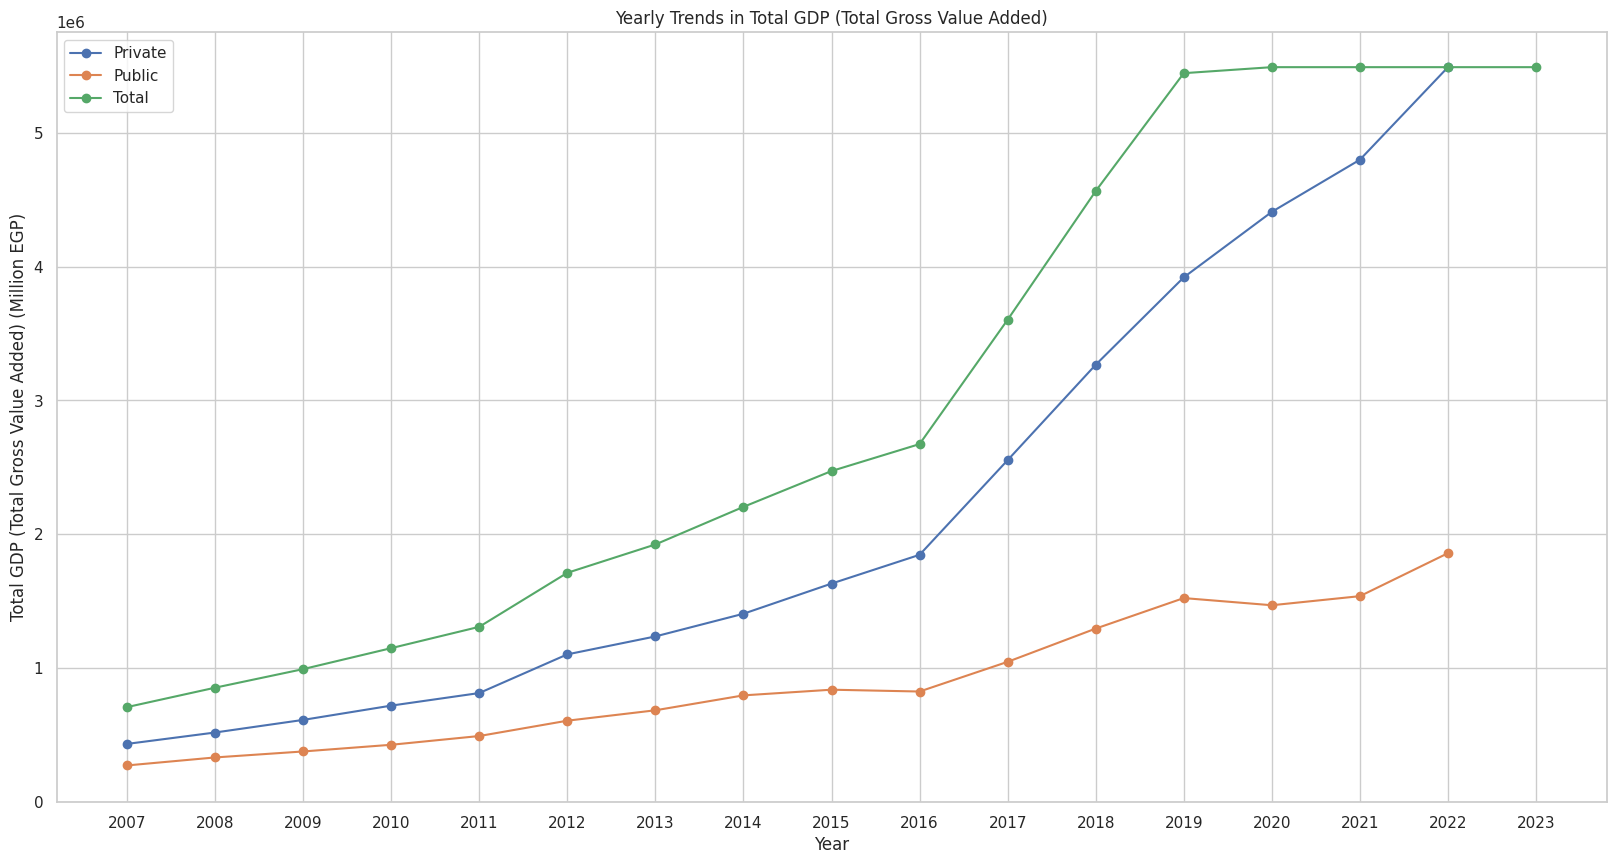

In [275]:
df_gdp = df[['Year', 'Sector', 'Total GDP (Total Gross Value Added)']]
# Pivot the dataframe to have sectors as columns and years as index
df_pivot = df_gdp.pivot(index='Year', columns='Sector', values='Total GDP (Total Gross Value Added)')

# Plot the data
plt.figure(figsize=(20, 10))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)

plt.title('Yearly Trends in Total GDP (Total Gross Value Added)')
plt.xlabel('Year')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')
plt.xticks(df_pivot.index)
plt.yticks(range(0, int(df_pivot.max().max()) + 100000, 1000000))  # Ensure each year is shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

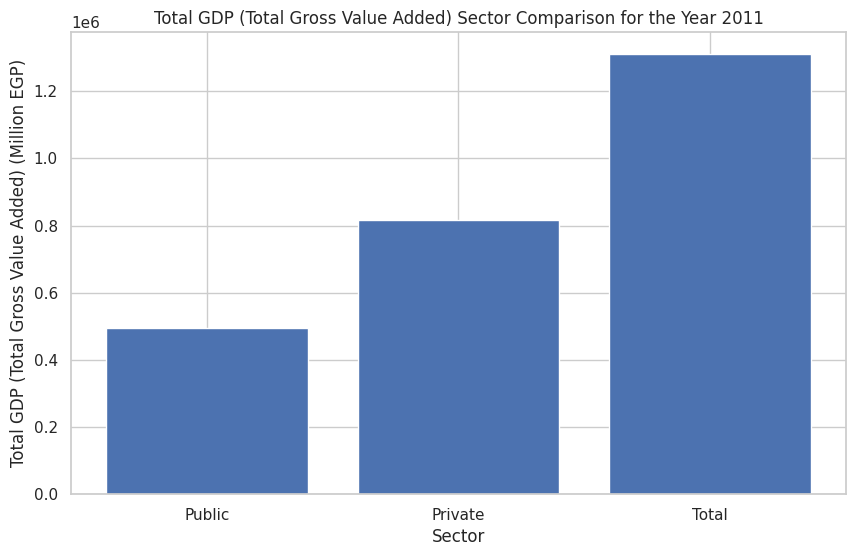

In [276]:
# Bar Chart:Total GDP (Total Gross Value Added) Sector Comparison for the Year 2011
year = 2011
df_year = df_gdp[df_gdp['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Total GDP (Total Gross Value Added)'])
plt.title(f'Total GDP (Total Gross Value Added) Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')

plt.show()

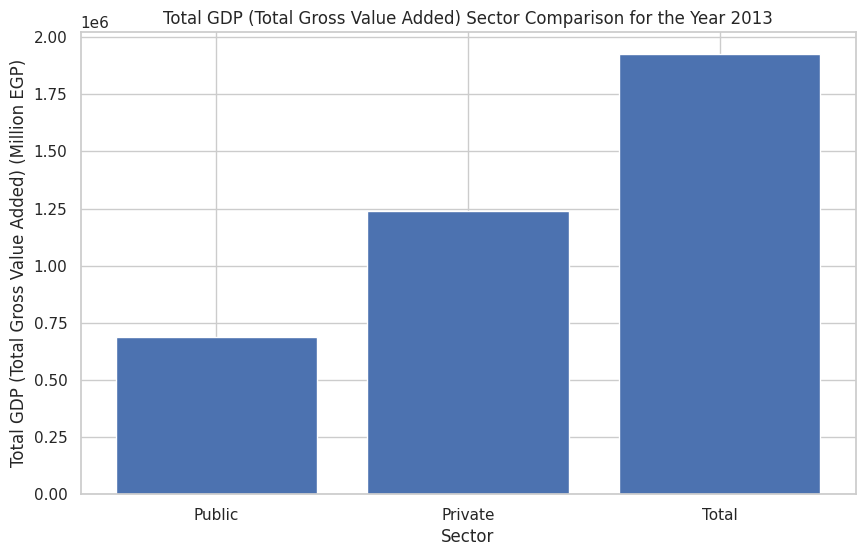

In [277]:
# Bar Chart:Total GDP (Total Gross Value Added) Sector Comparison for the Year 2013
year = 2013
df_year = df_gdp[df_gdp['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Total GDP (Total Gross Value Added)'])
plt.title(f'Total GDP (Total Gross Value Added) Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')

plt.show()

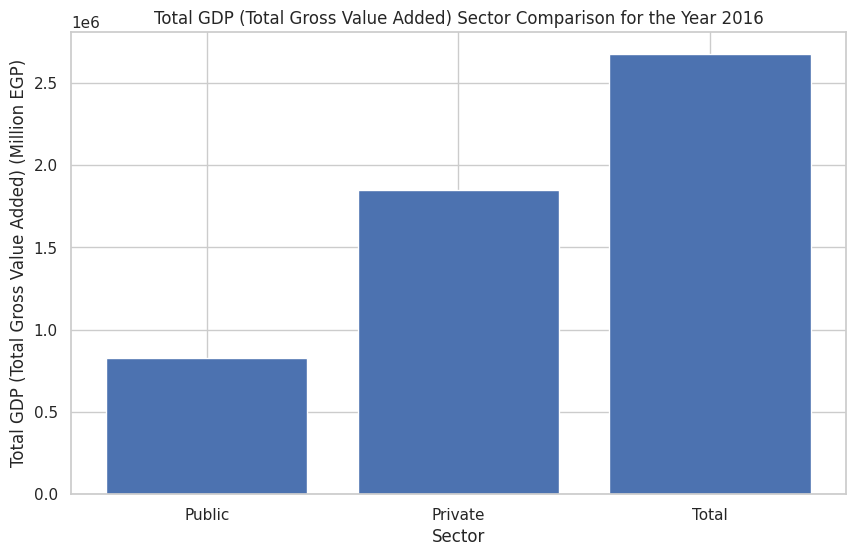

In [278]:
# Bar Chart:Total GDP (Total Gross Value Added) Sector Comparison for the Year 2016
year = 2016
df_year = df_gdp[df_gdp['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Total GDP (Total Gross Value Added)'])
plt.title(f'Total GDP (Total Gross Value Added) Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')

plt.show()

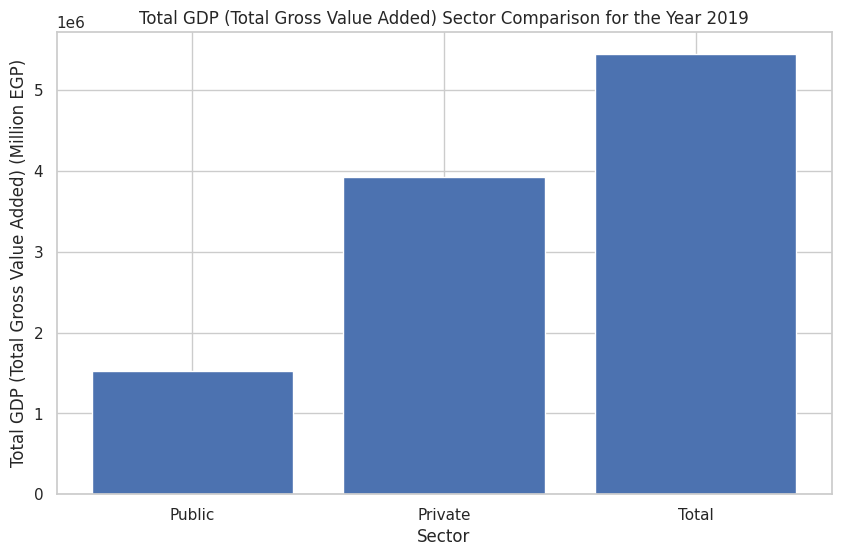

In [279]:
# Bar Chart:Total GDP (Total Gross Value Added) Sector Comparison for the Year 2019
year = 2019
df_year = df_gdp[df_gdp['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Total GDP (Total Gross Value Added)'])
plt.title(f'Total GDP (Total Gross Value Added) Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')

plt.show()

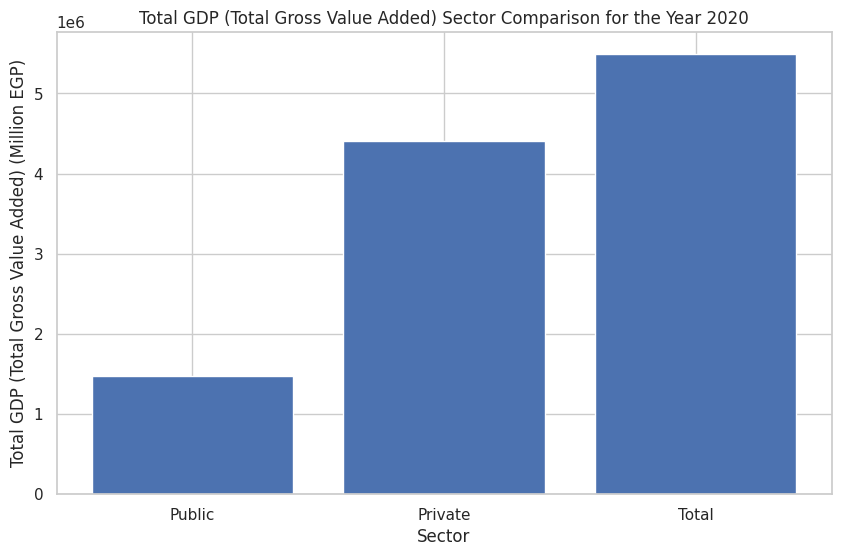

In [280]:
# Bar Chart:Total GDP (Total Gross Value Added) Sector Comparison for the Year 2020
year = 2020
df_year = df_gdp[df_gdp['Year'] == year]

plt.figure(figsize=(10, 6))
plt.bar(df_year['Sector'], df_year['Total GDP (Total Gross Value Added)'])
plt.title(f'Total GDP (Total Gross Value Added) Sector Comparison for the Year {year}')
plt.xlabel('Sector')
plt.ylabel('Total GDP (Total Gross Value Added) (Million EGP)')

plt.show()

through all upheavals the private sector contributes more to the GDP than the public sector.


<ipython-input-281-9c638558d577>:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation="vertical", fraction=0.02, pad=0.05)


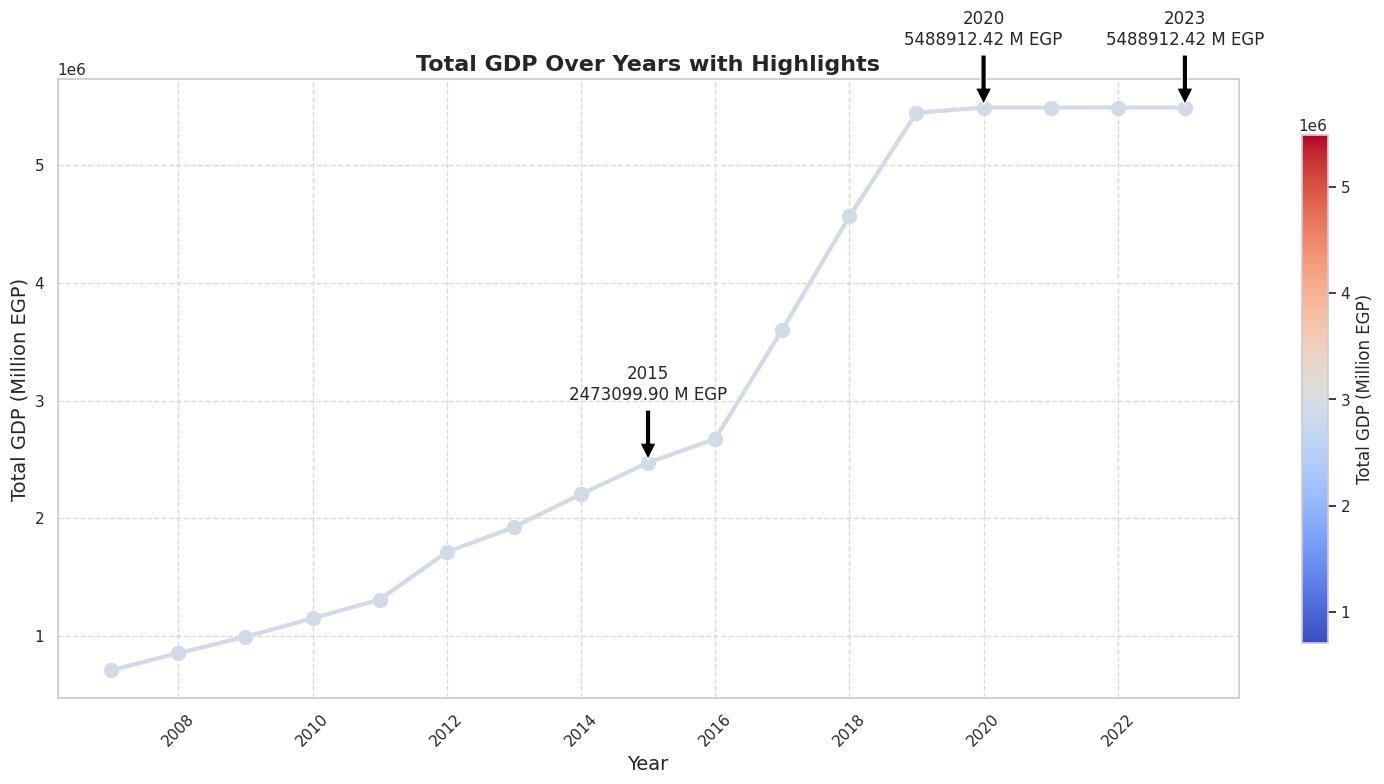

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Extract relevant columns for visualization
df_total = df[df['Sector'] == 'Total'][['Year', 'Total GDP (Total Gross Value Added)']]



# Ensure all data types are correct and handle any conversion issues
df_total['Year'] = pd.to_numeric(df_total['Year'], errors='coerce')
df_total['Total GDP (Total Gross Value Added)'] = pd.to_numeric(df_total['Total GDP (Total Gross Value Added)'], errors='coerce')

# Filter out rows with NaN values
df_total = df_total.dropna(subset=['Year', 'Total GDP (Total Gross Value Added)'])

# Set the style and palette for a more impressive look
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 10)

# Create a more complex and visually appealing plot
plt.figure(figsize=(14, 8))

# Add a background gradient based on GDP values
norm = plt.Normalize(df_total['Total GDP (Total Gross Value Added)'].min(), df_total['Total GDP (Total Gross Value Added)'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Plot the line with markers
plt.plot(df_total['Year'], df_total['Total GDP (Total Gross Value Added)'], marker='o', linestyle='-', color=palette[4], linewidth=3, markersize=10)

# Highlight specific years with annotations
highlight_years = [2015, 2020, 2023]
for year in highlight_years:
    gdp_value = df_total[df_total['Year'] == year]['Total GDP (Total Gross Value Added)'].values[0]
    plt.annotate(f'{year}\n{gdp_value:.2f} M EGP', xy=(year, gdp_value), xytext=(year, gdp_value + 500000),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, ha='center', va='bottom')

# Add title and labels
plt.title('Total GDP Over Years with Highlights', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total GDP (Million EGP)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for the background gradient
cbar = plt.colorbar(sm, orientation="vertical", fraction=0.02, pad=0.05)
cbar.set_label('Total GDP (Million EGP)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()